   **Python ile Veri Bilimi**


İbrahim Emre BAŞ

**Ödevde Kullanılan Veriseti Adı:** Heart Attack Dataset

**Veriseti Linki:** https://www.kaggle.com/datasets/sukhmandeepsinghbrar/heart-attack-dataset

**Verisetinin Tanımı:** Heart Attack Dataset, Irak'ın Erbil şehrinde bulunan Zheen hastanesindeki verilerle oluşturulmuş bir verisetidir. Bu verisetinde, Zheen hastanesine Ocak 2019 ve Mayıs 2019 arası kaydedilen kalp krizi vakaları ve detayları vardır. Bu veri setinin özellikleri şunlardır: yaş, cinsiyet, kalp atış hızı, sistolik kan basıncı, diyastolik kan basıncı, kan şekeri, ck-mb ve Negatif veya pozitif çıkışlı troponin. Cinsiyet sütunu, kayıtlı hasta erkek ise 1, kadın ise 0'a ayarlanmıştır.

**:**

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('C:\\Users\\Asus\\Desktop\\Ders\\Pyhton ile Veri Bilimine Giriş\\Final Ödevi\\Medicaldataset.csv')
df.head()
from warnings import filterwarnings
filterwarnings('ignore')
#uyarıları kapatmak icin

In [2]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
df.info()
#Veri seti hakkında genel bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
import pandas as pd 
df.Result= pd.Categorical(df.Result)
df.info()
#object olan Result sütununu category türüne dönüştürme. İleride kullanırken bizim kolayımıza gelecek.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1319 non-null   int64   
 1   Gender                    1319 non-null   int64   
 2   Heart rate                1319 non-null   int64   
 3   Systolic blood pressure   1319 non-null   int64   
 4   Diastolic blood pressure  1319 non-null   int64   
 5   Blood sugar               1319 non-null   float64 
 6   CK-MB                     1319 non-null   float64 
 7   Troponin                  1319 non-null   float64 
 8   Result                    1319 non-null   category
dtypes: category(1), float64(3), int64(5)
memory usage: 84.0 KB


In [5]:
katdf=df.select_dtypes(include=["category"])
katdf.head()

,Result
0,negative
1,positive
2,negative
3,positive
4,negative


In [6]:
katdf.Result.unique()

['negative', 'positive']
Categories (2, object): ['negative', 'positive']

<Axes: ylabel='Result'>

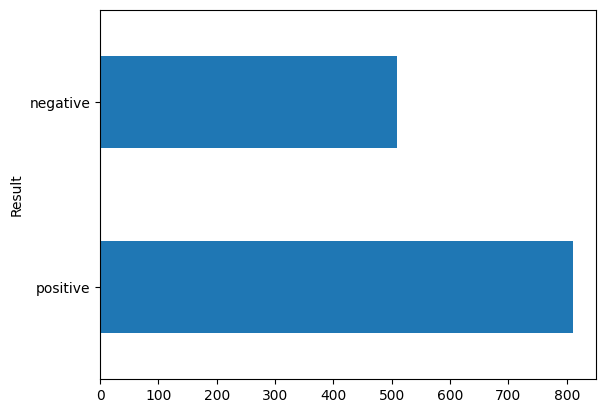

In [7]:
df["Result"].value_counts().plot.barh()
#Hastaneye gelen vakaların kalp krizi olup olmama durumunun sayısal verileri

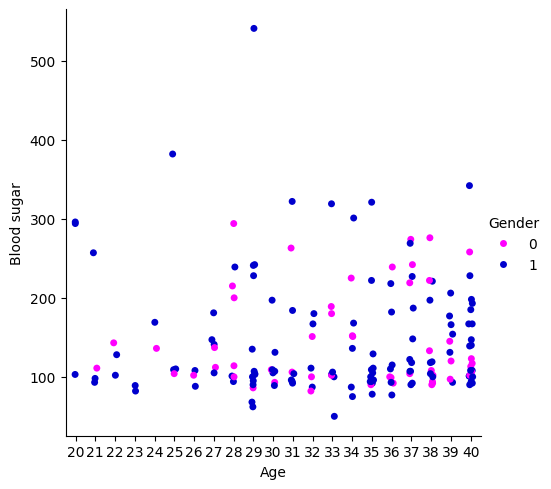

In [8]:
# Age değerini 20-40 arasında tutarak filtreleme
custom_color=["fuchsia","mediumblue"]
ageFiltered_df = df[(df['Age'] >= 20) & (df['Age'] <= 40)]
sns.catplot(x="Age",y="Blood sugar", hue="Gender", palette=custom_color,data=ageFiltered_df)
#20-40 yaş arası vakaların Kan şekeri grafiği 0=Kadın, 1=Erkek

<Axes: xlabel='Troponin', ylabel='Count'>

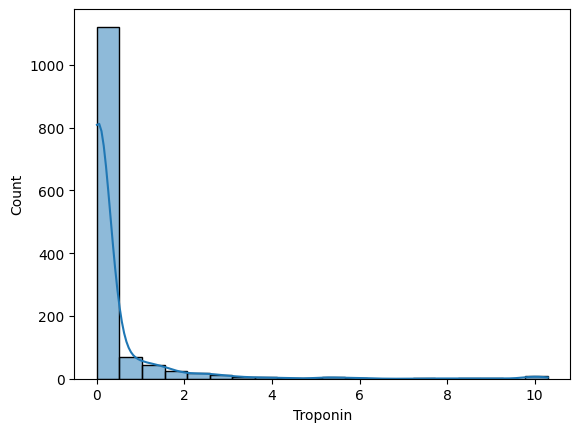

In [9]:
sns.histplot(df.Troponin,bins=20, kde=True)
#Troponin değerlerine göre kayıtlı hastaların sayısı gösteren histogram

<Axes: xlabel='Age', ylabel='Density'>

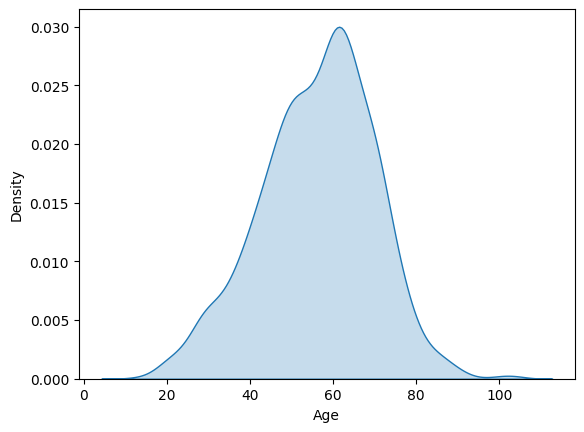

In [10]:
sns.kdeplot(df.Age, fill = True)
#Yaş değerlerinin yoğunluğunu gösteren bir Kernel Density Estimate grafiği

<Axes: xlabel='Diastolic blood pressure'>

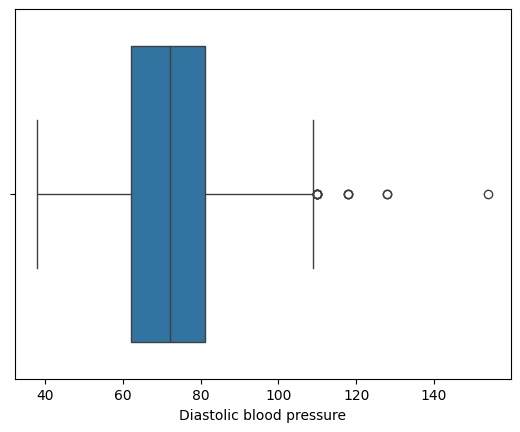

In [11]:
sns.boxplot(x=df["Diastolic blood pressure"])
#Genel olarak diastolic kan basıncı grafiği

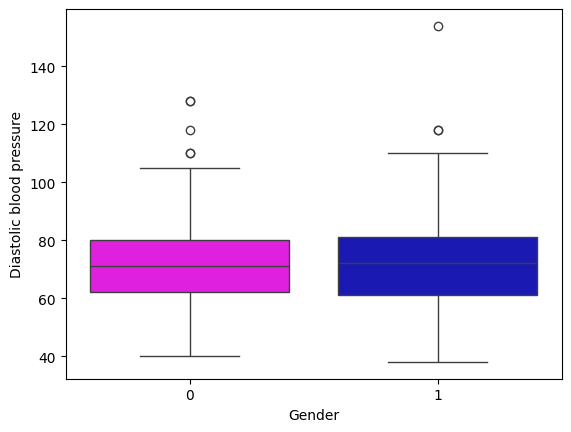

In [12]:
custom_color=["fuchsia","mediumblue"]
sns.boxplot(x = "Gender", y = "Diastolic blood pressure", palette=custom_color ,data = df);
#Cinsiyete göre diastolic kan basıncı karşılaştırması 

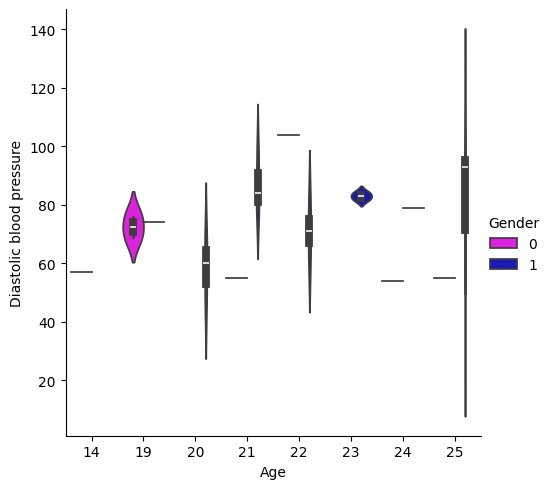

In [13]:
# Age değerini 10-20 arasında tutarak filtreleme
custom_color=["fuchsia","mediumblue"]
ageFiltered_df_1 = df[(df['Age'] >= 10) & (df['Age'] <= 25)]
sns.catplot(x= "Age", y = "Diastolic blood pressure", hue = "Gender",kind = "violin", palette=custom_color,data = ageFiltered_df_1);

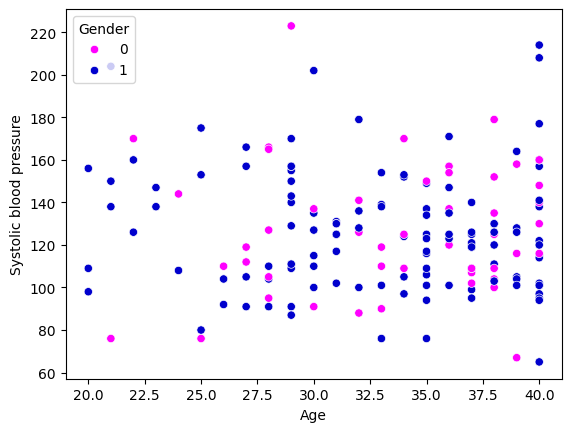

In [14]:
custom_color=["fuchsia","mediumblue"]
sns.scatterplot(x = "Age", y = "Systolic blood pressure", hue= "Gender", palette=custom_color,data = ageFiltered_df);

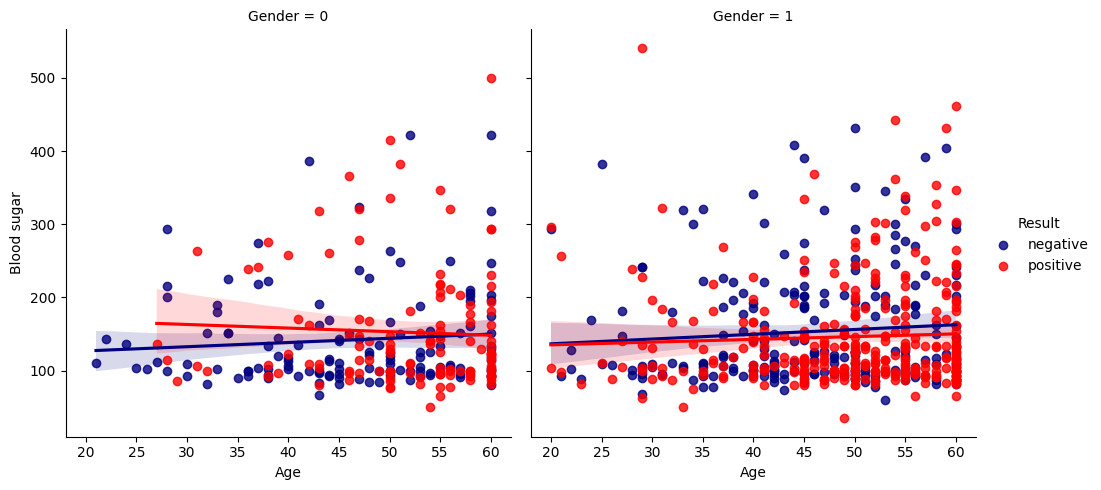

In [15]:
# Age değerini 20-60 arasında tutarak filtreleme
custom_color=["navy","red"]
ageFiltered_df_2 = df[(df['Age'] >= 20) & (df['Age'] <= 60)]
sns.lmplot(x = "Age", y = "Blood sugar", hue = "Result", col = "Gender", palette=custom_color, data = ageFiltered_df_2)
#Cinsiyete ve 20-60 yaş arasındaki vakaların pozitif veya negatif olmasına göre insanların kan şekeri değerlerinin grafiği ve
#standart sapma değerleri

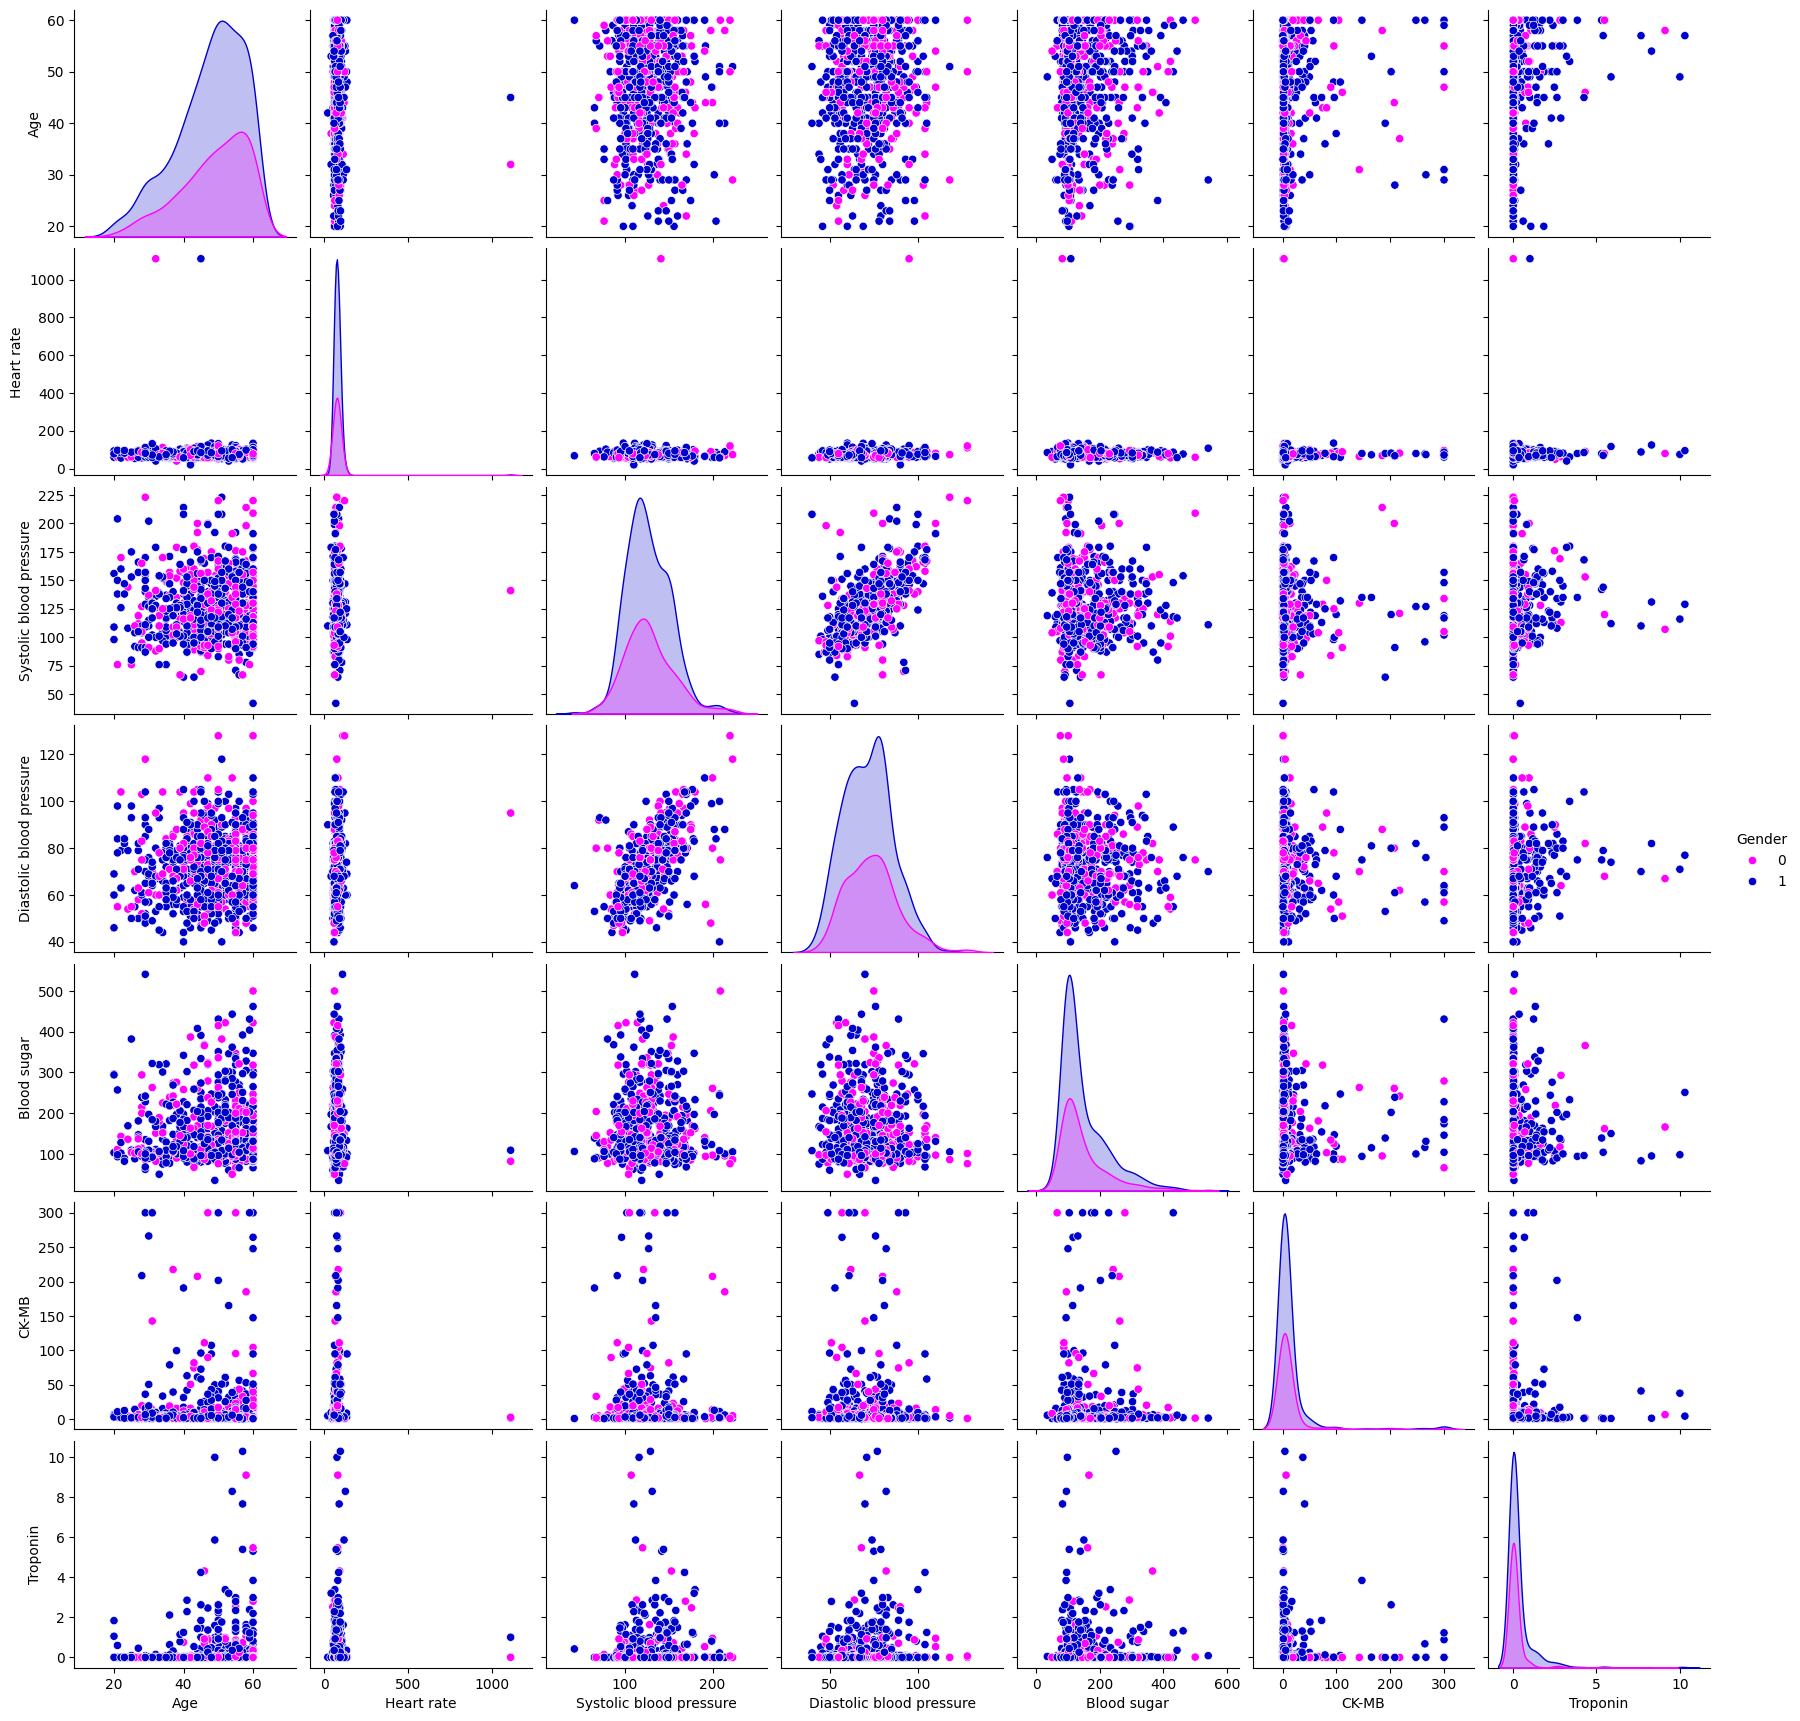

In [16]:
custom_color=["fuchsia","mediumblue"]
sns.pairplot(ageFiltered_df_2, hue = "Gender", palette=custom_color)
#Sayısal değişkenler arasındaki ilişkiyi matris haline gösterme şeklidir. Cinsiyete göre renklendirme yapılmıştır

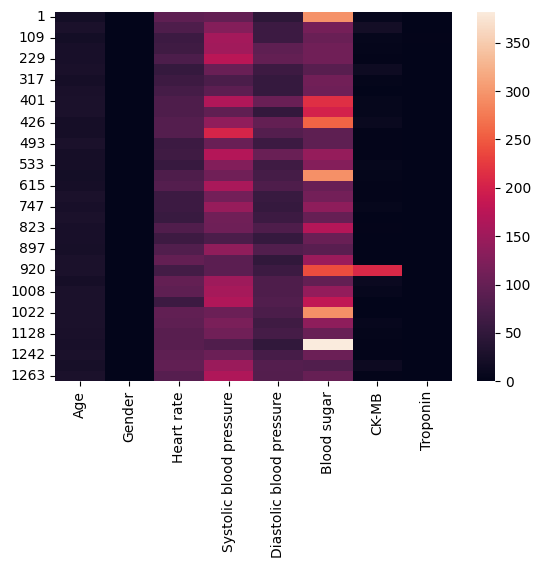

In [17]:
numeric_df = df[(df['Age'] >= 20) & (df['Age'] <= 28)].select_dtypes(include=['number'])
sns.heatmap(numeric_df);

<Axes: xlabel='Age', ylabel='Blood sugar'>

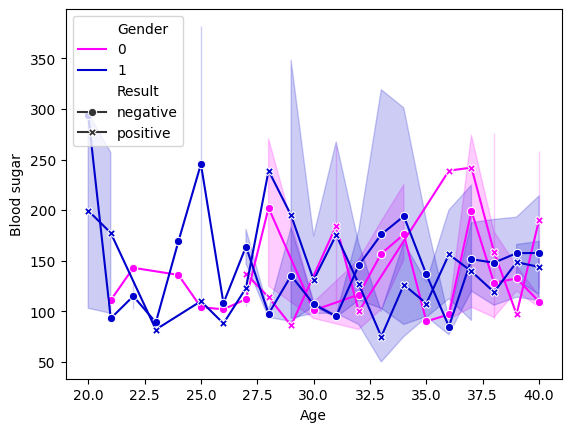

In [18]:
custom_color=["fuchsia","mediumblue"]
sns.lineplot(x = "Age", 
             y = "Blood sugar", 
             hue = "Gender", 
             style = "Result", 
             palette= custom_color,
             data = ageFiltered_df,
             markers=True,
             dashes=False
            )

<Axes: xlabel='Age'>

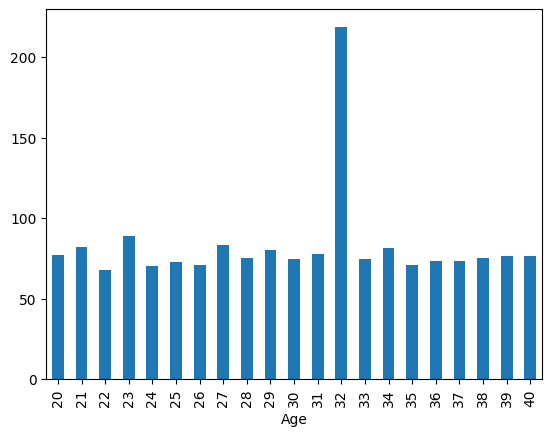

In [19]:
ageFiltered_df[["Heart rate","Age"]].groupby("Age")["Heart rate"].mean().plot(kind="bar")

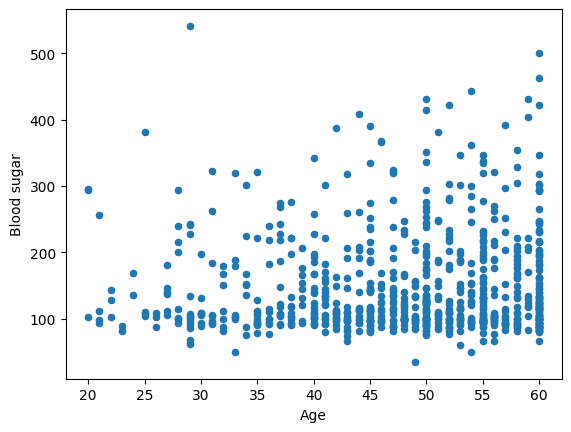

In [20]:
ageFiltered_df_2.plot.scatter("Age","Blood sugar");

In [21]:
!pip install missingno

<Axes: >

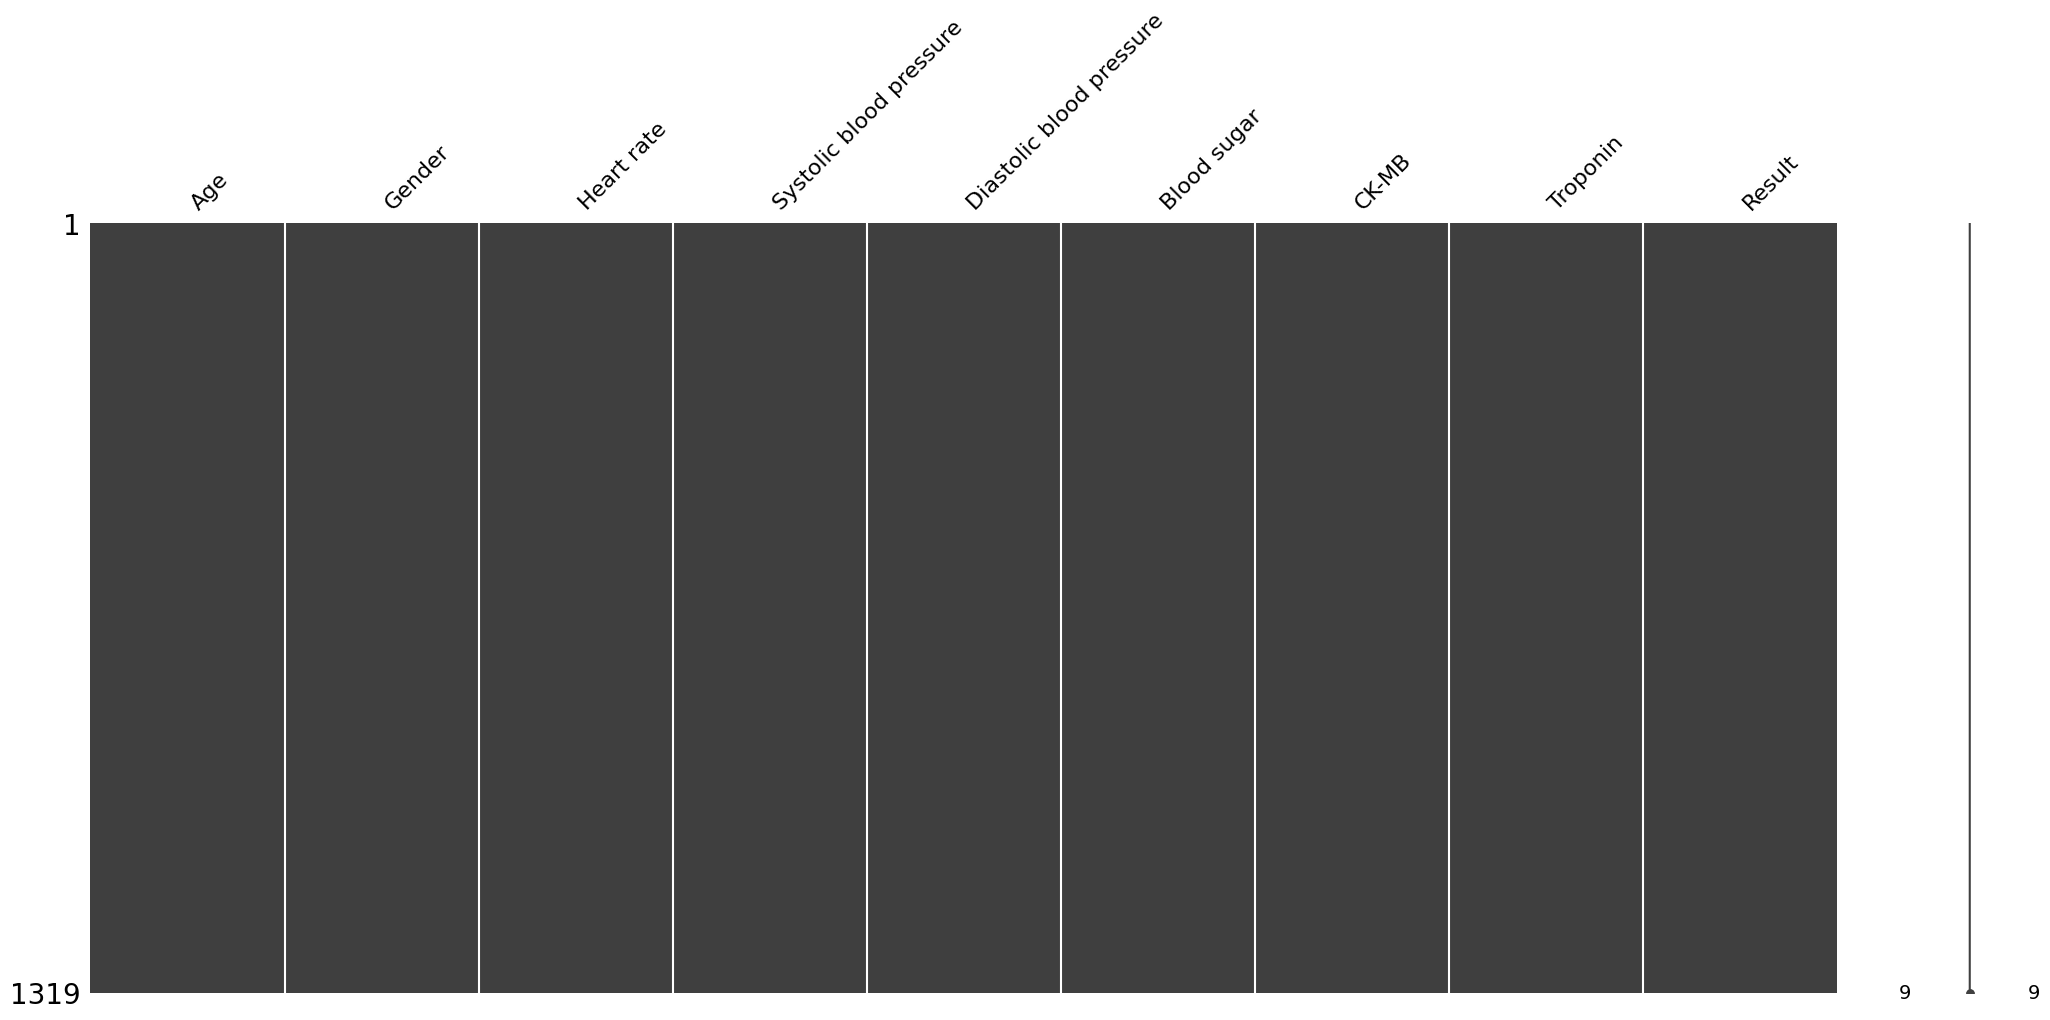

In [22]:
import missingno as msno
msno.matrix(df)
#Veri setinde eksik verileri görsel olarak görmemizi sağlar. Bu veri setinde eksik veri olmadığı için 
#Bunu grafikte inceleyemiyoruz

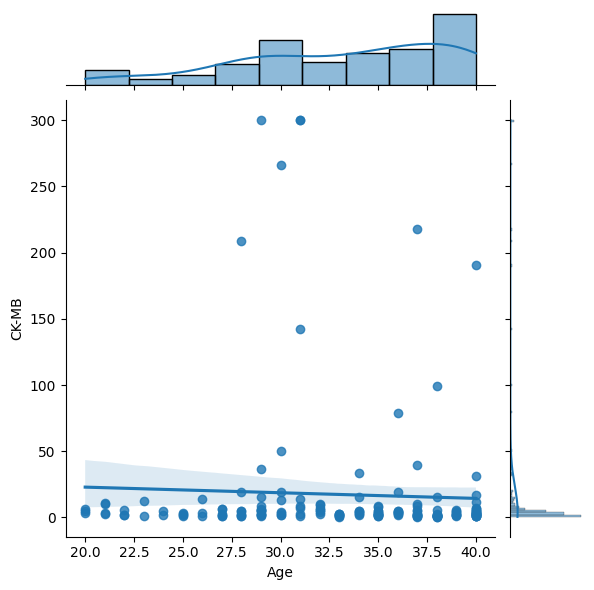

In [24]:
sns.jointplot(x = "Age", y = "CK-MB", data = ageFiltered_df, kind = "reg")

**Doğrusal Regresyon**

In [25]:
numeric_df.corr() 
#Pearson korelasyon katsayılarını hesaplar ve bir korelasyon matrisi döner.
#Korelasyon, iki değişken arasındaki ilişkiyi ve bu ilişkinin yönünü ve gücünü ölçer.
#Pearson korelasyon katsayısı, -1 ile 1 arasında bir değer alır
#1: Mükemmel pozitif korelasyon. Bir değişken artarken diğeri de artar.
#-1: Mükemmel negatif korelasyon. Bir değişken artarken diğeri azalır.
#0: Hiçbir korelasyon yok. Değişkenler arasında hiçbir ilişki yoktur.
# tek bir bağımlı değişken (y) ile bir bağımsız değişken (x) arasındaki ilişkiyi inceler. 

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Age,1.000000,-0.310016,-0.018049,-0.221356,-0.118395,-0.054608,0.185418,-0.427284
Gender,-0.310016,1.000000,0.059648,0.098881,0.060056,0.035533,0.121156,0.229612
Heart rate,-0.018049,0.059648,1.000000,0.066270,0.149471,0.263329,-0.090024,0.033397
Systolic blood pressure,-0.221356,0.098881,0.066270,1.000000,0.752306,-0.305650,-0.177841,0.075628
Diastolic blood pressure,-0.118395,0.060056,0.149471,0.752306,1.000000,-0.116072,-0.104179,-0.194358
Blood sugar,-0.054608,0.035533,0.263329,-0.305650,-0.116072,1.000000,0.191050,0.008929
CK-MB,0.185418,0.121156,-0.090024,-0.177841,-0.104179,0.191050,1.000000,-0.040204
Troponin,-0.427284,0.229612,0.033397,0.075628,-0.194358,0.008929,-0.040204,1.000000


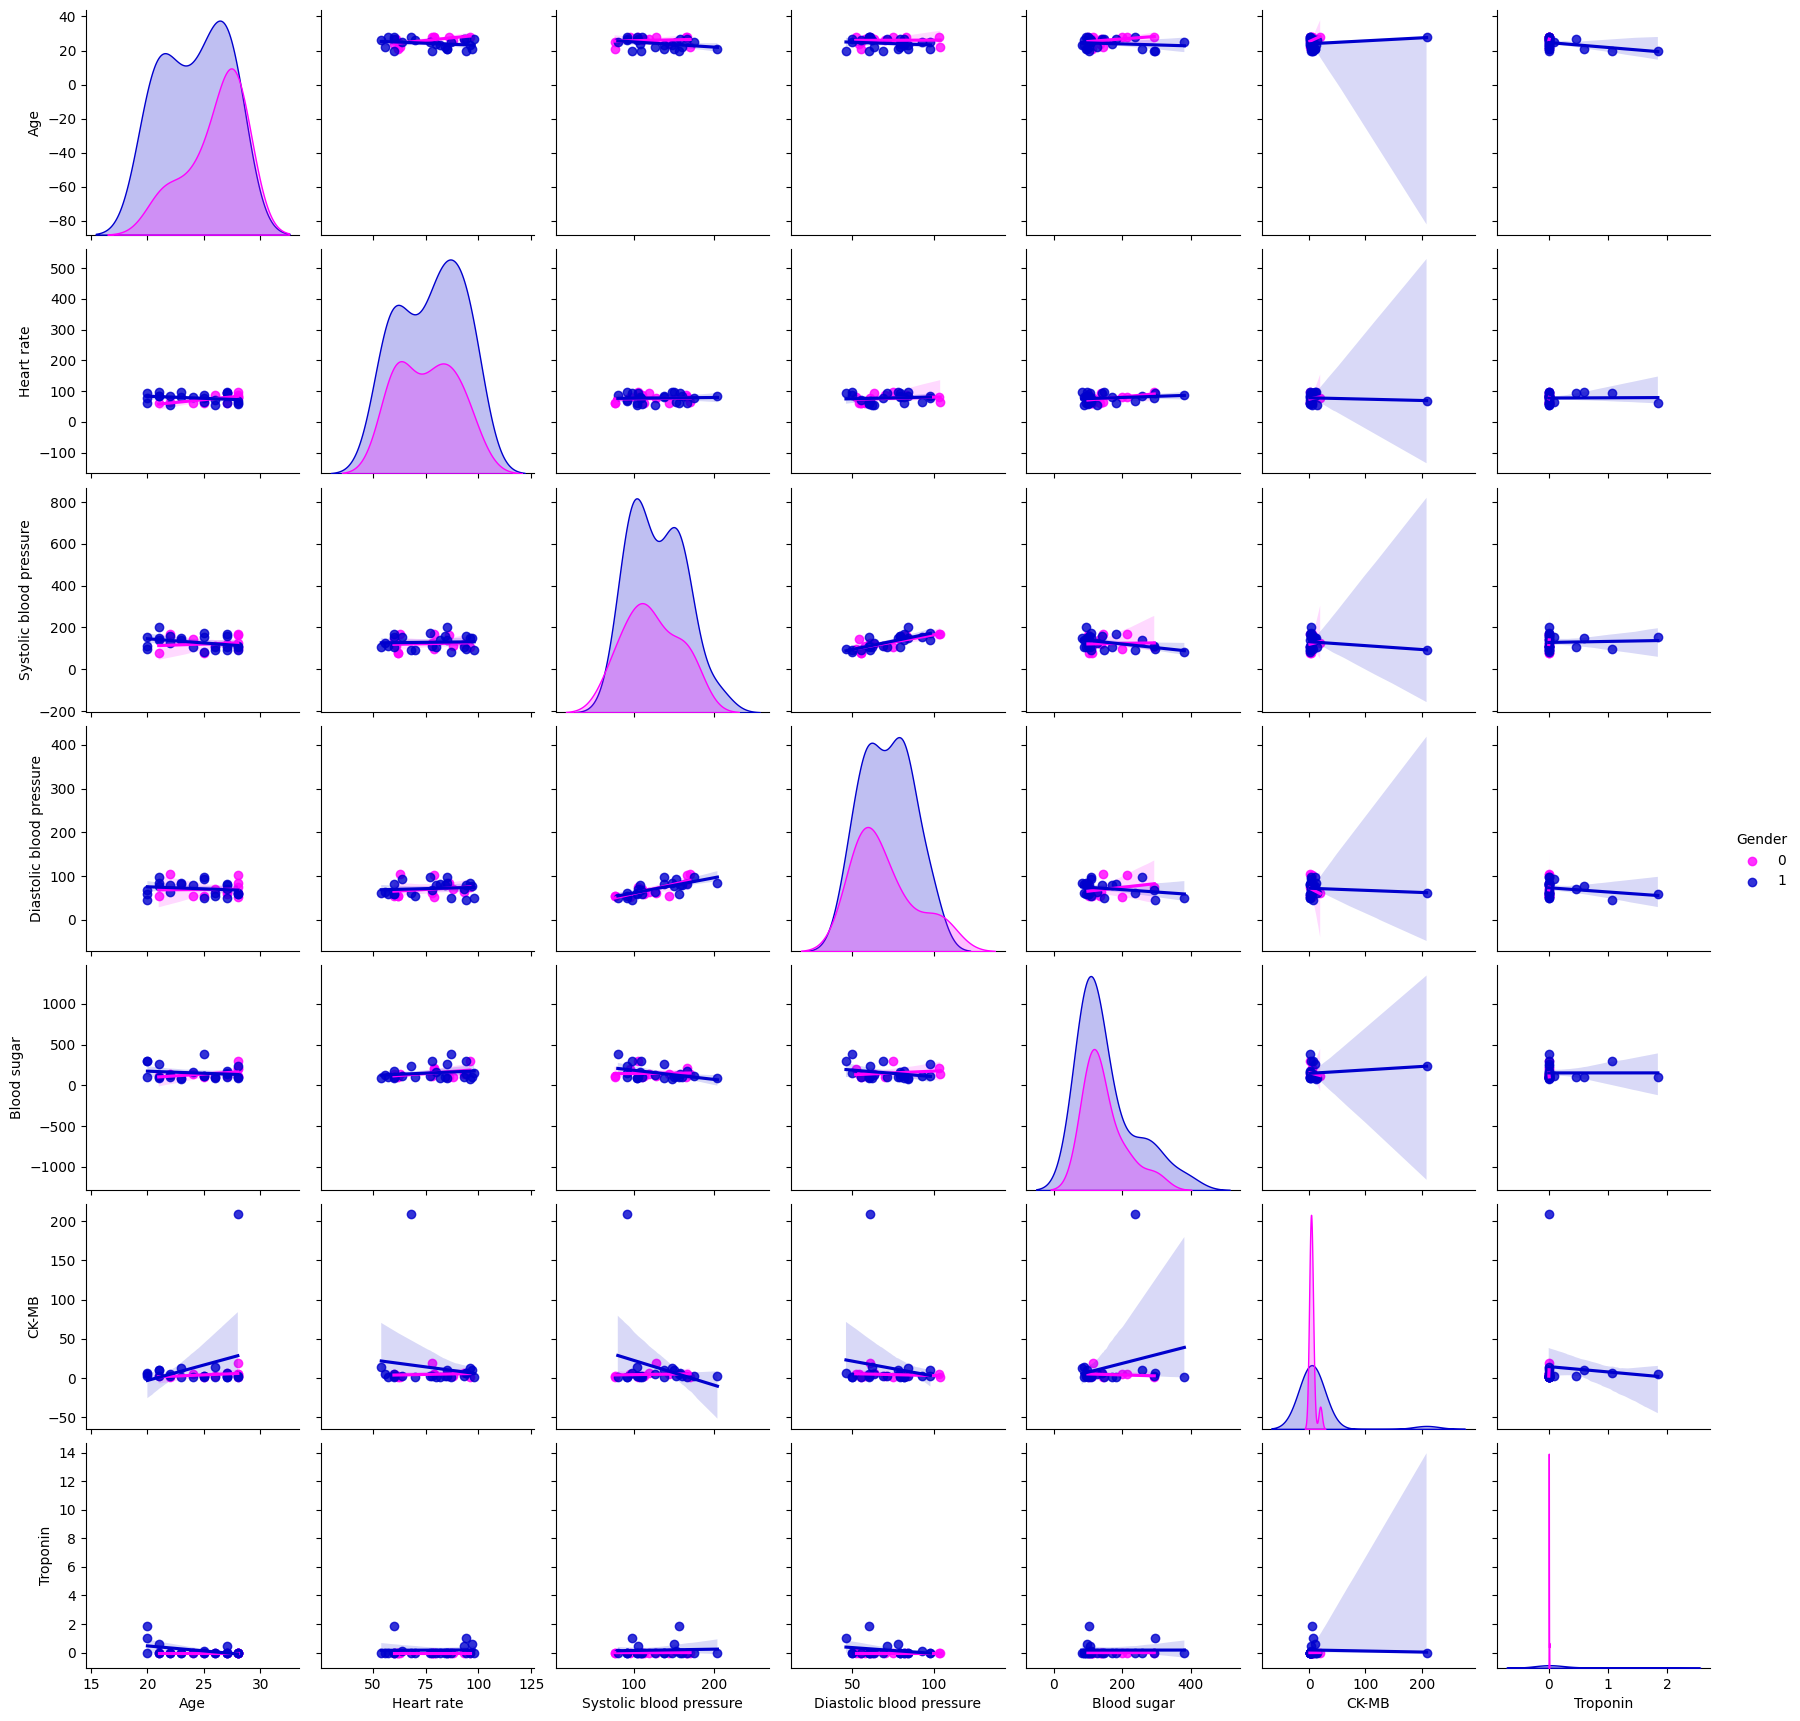

In [26]:
custom_color=["fuchsia","mediumblue"]
sns.pairplot(numeric_df, kind  ="reg", hue="Gender", palette=custom_color);

In [27]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [28]:
numeric_all_df = df.select_dtypes(include=['number'])

In [29]:
numeric_all_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,63,1,66,160,83,160.0,1.80,0.012
1,20,1,94,98,46,296.0,6.75,1.060
2,56,1,64,160,77,270.0,1.99,0.003
3,66,1,70,120,55,270.0,13.87,0.122
4,54,1,64,112,65,300.0,1.08,0.003


In [32]:
import statsmodels.api as sm
X = df[["Systolic blood pressure"]]
X[0:5]
#Bağımsız değişkenimizi alıyoruz

,Systolic blood pressure
0,160
1,98
2,160
3,120
4,112


In [33]:
#elinizde tek degiskenli bir matris var ve regresyon problemini cozmek icin, matris islemlerinin yapilabilmesi icin
#matrise sabit 1 ifadesi eklememiz gerekiyor (beta0 için kullanacagiz).
X = sm.add_constant(data=X)
X[0:5]

,const,Systolic blood pressure
0,1.0,160
1,1.0,98
2,1.0,160
3,1.0,120
4,1.0,112


In [34]:
#bağımlı değişkenimizi de alıyoruz
y = df["Diastolic blood pressure"]
y[0:5]

0    83
1    46
2    77
3    55
4    65
Name: Diastolic blood pressure, dtype: int64

In [43]:
#modelin kurulması
lm = sm.OLS(y,X)
#modelin fit edilmesi
model = lm.fit()
#model ciktilarinin alinmasi
model.summary()
#sm.OLS() fonksiyonu, bağımlı değişken y ve bağımsız değişken X kullanarak bir OLS (ordinary least squares) regresyon modeli oluşturur. model = lm.fit() ifadesi, modeli veri üzerinde fit eder.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Diastolic blood pressure   R-squared:                       0.344
Model:                                  OLS   Adj. R-squared:                  0.343
Method:                       Least Squares   F-statistic:                     689.4
Date:                      Wed, 05 Jun 2024   Prob (F-statistic):          1.52e-122
Time:                              21:07:24   Log-Likelihood:                -5077.6
No. Observations:                      1319   AIC:                         1.016e+04
Df Residuals:                          1317   BIC:                         1.017e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      32.2223      1.557     20.694      0.000      29.168      35.277
Systolic blood pressure     0.3149      0.012     26.256      0.000       0.291       0.338
==============================================================================
Omnibus:                      164.884   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1567.579
Skew:                           0.149   Prob(JB):                         0.00
Kurtosis:                       8.332   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#sadece katsayıları görelim 
model.params

const                      32.222304
Systolic blood pressure     0.314906
dtype: float64

In [45]:
#katsayı detaylarını görelim
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,32.2223,1.557,20.694,0.000,29.168,35.277
Systolic blood pressure,0.3149,0.012,26.256,0.000,0.291,0.338


In [46]:
#katsayıların güven aralıkları
model.conf_int()

,0,1
const,29.167685,35.276923
Systolic blood pressure,0.291378,0.338435


In [50]:
#modelin anlamlılığına dair p-value değerini görelim
model.f_pvalue

1.5235762059532023e-122

In [51]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)
#Modelin F-testi p-değerini gösterir ve ekrana yazdırır.

f_pvalue:  0.0000


In [52]:
#f istatistiği
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  689.37


In [53]:
#modelin hata kareler ortalaması
model.mse_model

89189.8388710636

In [54]:
#düzeltilmiş rkare değeri
model.rsquared_adj

0.3430925393711547

In [55]:
#modelden tahmin edilen y değerleri
model.fittedvalues[0:5]

0    82.607339
1    63.083138
2    82.607339
3    70.011080
4    67.491828
dtype: float64

In [56]:
#gercek y degerleri
y[0:5]

0    83
1    46
2    77
3    55
4    65
Name: Diastolic blood pressure, dtype: int64

In [57]:
#model denklemi
print("Diastolic blood pressure = " +  str("%.2f" % model.params[0]) + " + Systolic blood pressure" + "*" + str("%.2f" % model.params[1]))

Diastolic blood pressure = 32.22 + Systolic blood pressure*0.31


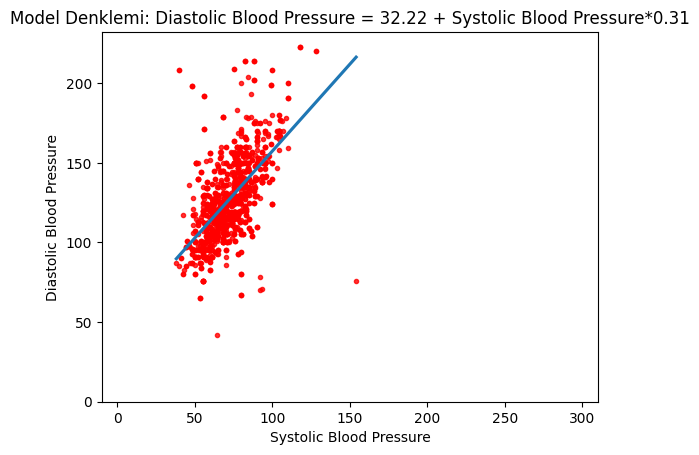

In [58]:
#modelin görsel olarak ifade edilmesi
g = sns.regplot(x=df["Diastolic blood pressure"], y=df["Systolic blood pressure"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Diastolic Blood Pressure = 32.22 + Systolic Blood Pressure*0.31")
g.set_ylabel("Diastolic Blood Pressure")
g.set_xlabel("Systolic Blood Pressure")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

**Sklearn ile Yapılması**

In [59]:
#aynı işlemin sklearn kutuphanesi ile yapılması
from sklearn.linear_model import LinearRegression

X = df[["Systolic blood pressure"]]
y = df["Diastolic blood pressure"]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

32.22230385840382
[0.31490647]


In [60]:
model.score(X,y)

0.34359095170850573

In [61]:
model.predict(X)[0:10]

array([82.60733882, 63.08313777, 82.60733882, 70.01108008, 67.49182833,
       67.49182833, 88.59056172, 99.61228811, 80.71790001, 82.60733882])

In [62]:
y[0:10]

0    83
1    46
2    77
3    55
4    65
5    58
6    68
7    82
8    81
9    95
Name: Diastolic blood pressure, dtype: int64

In [63]:
from sklearn.linear_model import LinearRegression
X = df[["Systolic blood pressure"]]
y = df["Diastolic blood pressure"]
reg = LinearRegression()
model = reg.fit(X, y)
model.predict([[80]])
#Tahmin

array([57.41482134])

In [64]:
#çoklu tahmin işlemi
yeni_veri = [[55],[90],[100]]
model.predict(yeni_veri)

array([49.54215963, 60.56388602, 63.71295071])

In [65]:
#Artıklar ve Makine Öğrenmesindeki Önemi
from sklearn.metrics import mean_squared_error, r2_score
from patsy import dmatrices
import statsmodels.formula.api as smf
formula = 'Q("Diastolic blood pressure") ~ Q("Systolic blood pressure")'
lm = smf.ols(formula, df)
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("Diastolic blood pressure")   R-squared:                       0.344
Model:                                       OLS   Adj. R-squared:                  0.343
Method:                            Least Squares   F-statistic:                     689.4
Date:                           Wed, 05 Jun 2024   Prob (F-statistic):          1.52e-122
Time:                                   21:10:39   Log-Likelihood:                -5077.6
No. Observations:                           1319   AIC:                         1.016e+04
Df Residuals:                               1317   BIC:                         1.017e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       32.2223      1.557     20.694      0.000      29.168      35.277
Q("Systolic blood pressure")     0.3149      0.012     26.256      0.000       0.291       0.338
==============================================================================
Omnibus:                      164.884   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1567.579
Skew:                           0.149   Prob(JB):                         0.00
Kurtosis:                       8.332   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
mse

129.18242248738025

In [67]:
import numpy as np
rmse = np.sqrt(mse)
rmse

11.36584455671378

In [68]:
model.predict(X)[0:10]

0    82.607339
1    63.083138
2    82.607339
3    70.011080
4    67.491828
5    67.491828
6    88.590562
7    99.612288
8    80.717900
9    82.607339
dtype: float64

In [69]:
y[0:10]

0    83
1    46
2    77
3    55
4    65
5    58
6    68
7    82
8    81
9    95
Name: Diastolic blood pressure, dtype: int64

In [70]:
#karşılaştırma tablosu
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,83,82.607339
1,46,63.083138
2,77,82.607339
3,55,70.011080
4,65,67.491828
5,58,67.491828
6,68,88.590562
7,82,99.612288
8,81,80.717900
9,95,82.607339


In [71]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,83,82.607339,0.392661
1,46,63.083138,-17.083138
2,77,82.607339,-5.607339
3,55,70.011080,-15.011080
4,65,67.491828,-2.491828
5,58,67.491828,-9.491828
6,68,88.590562,-20.590562
7,82,99.612288,-17.612288
8,81,80.717900,0.282100
9,95,82.607339,12.392661


In [72]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,83,82.607339,0.392661,0.154183
1,46,63.083138,-17.083138,291.833596
2,77,82.607339,-5.607339,31.442249
3,55,70.011080,-15.011080,225.332525
4,65,67.491828,-2.491828,6.209208
5,58,67.491828,-9.491828,90.094805
6,68,88.590562,-20.590562,423.971232
7,82,99.612288,-17.612288,310.192693
8,81,80.717900,0.282100,0.079580
9,95,82.607339,12.392661,153.578051


In [73]:
#toplam hata
np.sum(k_t["hata_kare"])

1532.888122057614

In [74]:
#hata kareler ortalaması
np.mean(k_t["hata_kare"])

153.28881220576142

In [75]:
#hata kareler ortalamasının karekoku
np.sqrt(np.mean(k_t["hata_kare"]))

12.38098591412499

In [76]:
#her bir tahmin için artıklar (hatalar)
model.resid[0:10]

0     0.392661
1   -17.083138
2    -5.607339
3   -15.011080
4    -2.491828
5    -9.491828
6   -20.590562
7   -17.612288
8     0.282100
9    12.392661
dtype: float64

**Artıkların Görselleştirilmesi**

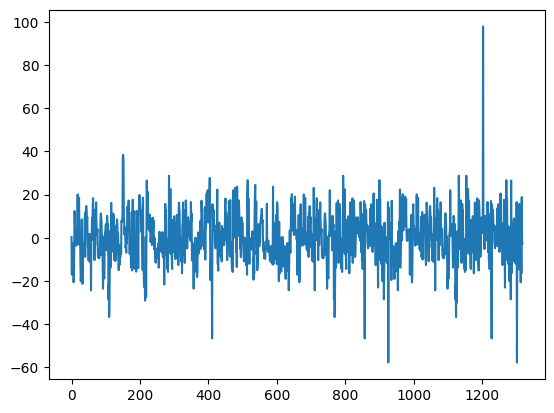

In [77]:
#artıkların görselleştirilmesi
#bu hatalar verisetindeki aykırı değerlerden mi kaynaklanıyor gibi soruların sorulabileceği 
#ve bu sorulara yanıt aramaya bizi sevk edecek gözlemler
plt.plot(model.resid)

**Çoklu Doğrusal Regresyon**

In [78]:
numeric_all_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,63,1,66,160,83,160.0,1.80,0.012
1,20,1,94,98,46,296.0,6.75,1.060
2,56,1,64,160,77,270.0,1.99,0.003
3,66,1,70,120,55,270.0,13.87,0.122
4,54,1,64,112,65,300.0,1.08,0.003


In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = numeric_all_df.drop("Diastolic blood pressure", axis = 1)
y = numeric_all_df["Diastolic blood pressure"]
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 65)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1055, 7)
(1055,)
(264, 7)
(264,)


In [80]:
#verisetinin bütününün kopyası
training = numeric_all_df.copy()
training.shape

(1319, 8)

**Statsmodels ile Modelleme**

In [81]:
#Statsmodels ile modelleme
#Yorumlama yapmak gibi bir niyetimiz var ise statsmdels kullanmak daha avantajlı olacaktır
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Diastolic blood pressure   R-squared (uncentered):                   0.972
Model:                                  OLS   Adj. R-squared (uncentered):              0.972
Method:                       Least Squares   F-statistic:                              5194.
Date:                      Wed, 05 Jun 2024   Prob (F-statistic):                        0.00
Time:                              21:12:23   Log-Likelihood:                         -4147.2
No. Observations:                      1055   AIC:                                      8308.
Df Residuals:                          1048   BIC:                                      8343.
Df Model:                                 7                                                  
Covariance Type:                  nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.1888      0.023      8.334      0.000       0.144       0.233
Gender                      2.4205      0.786      3.079      0.002       0.878       3.963
Heart rate                  0.0436      0.007      6.707      0.000       0.031       0.056
Systolic blood pressure     0.4303      0.011     39.507      0.000       0.409       0.452
Blood sugar                 0.0089      0.005      1.847      0.065      -0.001       0.018
CK-MB                      -0.0006      0.008     -0.077      0.938      -0.017       0.015
Troponin                   -0.1211      0.307     -0.394      0.694      -0.724       0.482
==============================================================================
Omnibus:                      152.907   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1975.434
Skew:                           0.032   Prob(JB):                         0.00
Kurtosis:                       9.703   Cond. No.                         466.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Scikit-Learn ile Modelleme**

In [82]:
#scikit-learn ile modelleme
#Diğer makine öğrenmesi algoritmalarıyla uyumlu ancak yorumlama konusunda statsmodels kadar becerikli değildir.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
#sabit katsayı
print(model.intercept_)
#bağımsız deşişken katsayıları 
print(model.coef_)

33.03098491204508
[-0.01607369 -0.169612    0.02562131  0.30887428 -0.0069799  -0.00295106
  0.14387741]


**DENKLEM**

**Distolic blood pressure= 33.03+ Age*(-0.01)+ Gender*(-0.16)+ Heart rate*0.02 + Systolic blood pressure*0.3+ Blood sugar*(-0.006)+ CK-MB*(-0.002)+ Troponin*0.14

In [83]:
yeni_veri = [[34], [1],[75],[63],[220],[4.7],[0.122]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2,3,4,5,6
0,34.0,1.0,75.0,63.0,220.0,4.7,0.122


In [84]:
model.predict(yeni_veri)

array([52.16364977])

In [85]:
from sklearn.metrics import mean_squared_error
#eğitim hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

11.40283228351711

In [86]:
#test hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

10.67754370353335

In [87]:
#Model Tuning / Model Doğrulama

X = numeric_all_df.drop('Diastolic blood pressure', axis=1)
y = numeric_all_df["Diastolic blood pressure"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=80)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [93]:
# Eğitim seti üzerindeki RMSE
rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Eğitim seti RMSE: ", rmseTrain)
#Test seti üzerindeki RMSE
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("Test seti RMSE: ", rmseTest)
#Eğitim seti üzerindeki R-kare değeri
print("Eğitim seti R-kare: ",model.score(X_train, y_train))
model.score(X_train, y_train)

Eğitim seti RMSE:  10.78398816943495
Test seti RMSE:  13.03476351104589
Eğitim seti R-kare:  0.389401298019166


0.389401298019166

In [94]:
#eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.2205025832841258

In [95]:
#neg_mean_squared_error'da sonuc negatif olacağı için üstte (-) ile çarpıyoruz 
rmseTrain=np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTest)

11.815881985617926
14.064047533738663


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1319 non-null   int64   
 1   Gender                    1319 non-null   int64   
 2   Heart rate                1319 non-null   int64   
 3   Systolic blood pressure   1319 non-null   int64   
 4   Diastolic blood pressure  1319 non-null   int64   
 5   Blood sugar               1319 non-null   float64 
 6   CK-MB                     1319 non-null   float64 
 7   Troponin                  1319 non-null   float64 
 8   Result                    1319 non-null   category
dtypes: category(1), float64(3), int64(5)
memory usage: 84.0 KB


**PCR (Temel Bileşen Regresyonu - Principal Component Regression)**

In [97]:
#kategorik değişkenlerin dummy değişkene dönüştürülmesi
dms = pd.get_dummies(df[['Result']])
dms.head()
#Bu yöntem, özellikle bağımsız değişkenler arasında yüksek korelasyon olduğunda veya değişken sayısı gözlem sayısından fazla olduğunda yararlıdır.

,Result_negative,Result_positive
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False


In [98]:
y = df["Diastolic blood pressure"]

In [99]:
X_ = df.drop(["Diastolic blood pressure","Result"], axis = 1).astype("float64")
X_.head()

,Age,Gender,Heart rate,Systolic blood pressure,Blood sugar,CK-MB,Troponin
0,63.0,1.0,66.0,160.0,160.0,1.80,0.012
1,20.0,1.0,94.0,98.0,296.0,6.75,1.060
2,56.0,1.0,64.0,160.0,270.0,1.99,0.003
3,66.0,1.0,70.0,120.0,270.0,13.87,0.122
4,54.0,1.0,64.0,112.0,300.0,1.08,0.003


In [100]:
#dummy degisken tuzagindan kurtariyoruz
X = pd.concat([X_, dms[["Result_positive"]]], axis = 1)
X.head()

,Age,Gender,Heart rate,Systolic blood pressure,Blood sugar,CK-MB,Troponin,Result_positive
0,63.0,1.0,66.0,160.0,160.0,1.80,0.012,False
1,20.0,1.0,94.0,98.0,296.0,6.75,1.060,True
2,56.0,1.0,64.0,160.0,270.0,1.99,0.003,False
3,66.0,1.0,70.0,120.0,270.0,13.87,0.122,True
4,54.0,1.0,64.0,112.0,300.0,1.08,0.003,False


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=65)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (989, 8)
y_train (989,)
X_test (330, 8)
y_test (330,)
training (1319, 9)


In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train))
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]
#Normalde PCA n_components yani bileşen sayısı parametresini alır. Eğer parametreyi vermezsek bütün bileşenleri kullanır.

array([[ 0.4938279 , -0.1230351 , -0.29839251,  0.90136062, -0.33218398,
         0.27521808, -0.81455885, -0.26330636]])

In [103]:
#açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
#1. bilesen verisetindeki varyansın %17'sini ifade ettiğini belirtir.
#2. bileşenin kendinden önceki bileşenle birlikte verisetindeki varyansın %31'ini ifade ettiğini belirtir.
#3. bileşenin kendinden önceki bileşenlerle birlikte verisetindeki varyansın %44'unu ifade ettiğini belirtir.
#...

#burada 10 bileşenle verisetindeki varyansın %97'sini ifade edebiliyoruz.

array([ 17.9 ,  31.47,  44.63,  57.48,  69.88,  81.84,  92.15, 100.  ])

In [104]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

72.30839231547017
[ 0.2588729   1.95974668  5.1044104  -0.79084592  2.15694891  5.62288041
 -0.0780121  -0.63731048]


In [105]:
#Tahmin
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([71.02152601, 71.76426315, 65.77553077, 80.35622976, 85.03354762])

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

11.525842668800747

In [107]:
df["Diastolic blood pressure"].mean()

72.26914329037149

In [108]:
r2_score(y_train, y_pred)

0.3368105777736725

In [109]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

16.400717002153048

In [110]:
#Model tuning
lm = LinearRegression()
#tüm bileşenlerle ile deneyelim
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

16.400717002153048


In [111]:
lm = LinearRegression()
#20 bileşenle ile bir deneyelim
pcr_model = lm.fit(X_reduced_train[:,0:20], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:20])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

16.400717002153048


In [112]:
#cross validation sayesinde olası bileşen sayılarıni gonderip optimum bileşen sayısını belirleyebiliriz 
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
lm = LinearRegression()
RMSE = []


for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

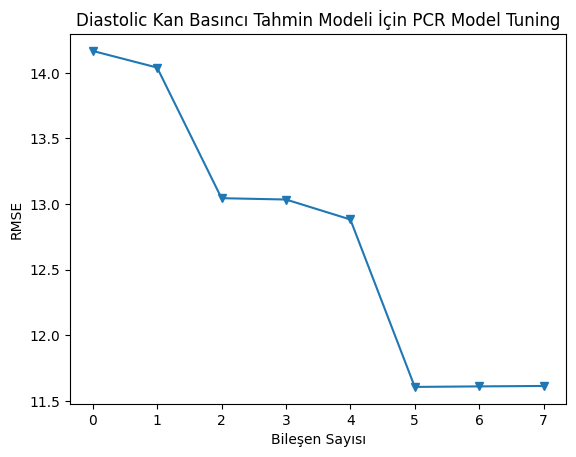

In [113]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Diastolic Kan Basıncı Tahmin Modeli İçin PCR Model Tuning');

In [114]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

11.537125840116067
16.38899882456404


**PLS (Kısmi En Küçük Kareler Regresyonu)**

In [115]:
#kategorik değişkenlerin dummy değişkene dönüştürülmesi
ms = pd.get_dummies(df[['Result']])
y = df["Diastolic blood pressure"]
X_ = df.drop(['Diastolic blood pressure','Result'], axis=1).astype('float64')
X = pd.concat([X_, ms[['Result_positive']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58)
#PLS, hem bağımsız (X) hem de bağımlı (Y) değişken matrislerinin varyansını en iyi şekilde açıklayan yeni bileşenler oluşturarak çalışır.

In [116]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)
#3 bilesene indirgeyebiliriz ancak bu ara katmandaki PLS factor sayisini belirler, degisken sayisi gene aynidir.
#pls_model = PLSRegression(n_components=3).fit(X_train, y_train)
pls_model.coef_

array([[-0.10084594, -0.24634324,  1.47271903,  8.27685099, -0.57569113,
        -0.25959016,  0.32450659,  0.17583122]])

In [117]:
X_train.head()

,Age,Gender,Heart rate,Systolic blood pressure,Blood sugar,CK-MB,Troponin,Result_positive
553,65.0,1.0,93.0,127.0,86.0,27.06,0.013,True
507,55.0,1.0,60.0,145.0,175.0,1.96,0.853,True
1243,23.0,1.0,96.0,147.0,82.0,12.57,0.005,True
237,45.0,1.0,65.0,117.0,98.0,3.00,0.004,False
1056,74.0,1.0,83.0,130.0,108.0,11.45,0.795,True


In [118]:
pls_model.predict(X_train)

array([[ 72.53922979],
       [ 77.09431595],
       [ 79.26397867],
       [ 68.54504023],
       [ 73.29228786],
       [ 75.44228257],
       [ 88.33363717],
       [ 82.53040508],
       [ 78.05010772],
       [ 81.77060463],
       [ 70.51046762],
       [ 66.69149267],
       [ 69.5931541 ],
       [ 76.09141967],
       [ 80.91918648],
       [ 66.79228685],
       [ 68.38733006],
       [ 82.48922469],
       [ 75.97230462],
       [ 67.76492082],
       [ 73.75482896],
       [ 63.29616737],
       [ 72.51577478],
       [ 89.41240434],
       [ 80.99435009],
       [ 63.84611644],
       [ 78.26175009],
       [ 68.88504869],
       [ 63.68206538],
       [ 95.72295026],
       [ 63.52094112],
       [ 67.33791481],
       [ 60.83831088],
       [ 71.75060674],
       [ 64.09031211],
       [ 62.96772315],
       [ 74.93801483],
       [ 76.29182358],
       [ 76.55552858],
       [ 68.98097068],
       [ 68.65152287],
       [ 55.85189178],
       [ 86.04933091],
       [ 78

In [119]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

11.272354903754655

In [120]:
r2_score(y_train, y_pred)

0.35960565337285655

In [121]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


11.23658270071209

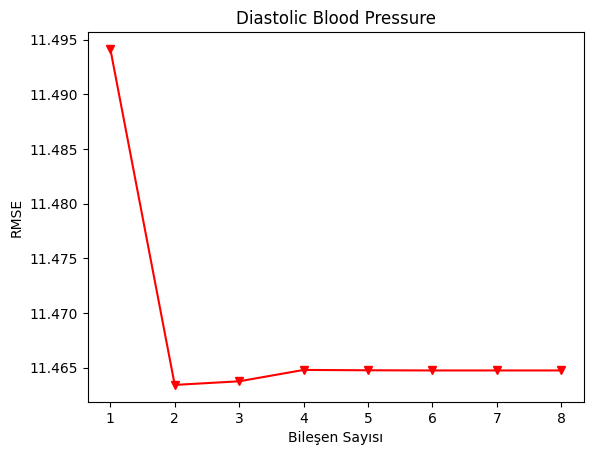

In [122]:
#Model Tuning
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Diastolic Blood Pressure');

In [123]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
#PLSRegression(n_components=2): Bu ifade, iki bileşenli bir PLS regresyon modeli oluşturur. n_components parametresi, modelin kaç bileşen kullanacağını belirtir.
#.fit(X_train, y_train): Bu yöntem, modeli eğitim verisi (X_train) ve bağımlı değişken (y_train) üzerinde eğitir.

In [124]:
y_pred = pls_model.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))
#PLSRegression(n_components=2) default değeri de 2 olduğundan aynı sonucu verdi

11.23658270071209

**Ridge Regresyonu**

In [126]:
#kategorik değişkenlerin dummy değişkene dönüştürülmesi
ms = pd.get_dummies(df[['Result']])
y = df["Diastolic blood pressure"]
X_ = df.drop(['Diastolic blood pressure','Result'], axis=1).astype('float64')
X = pd.concat([X_, ms[['Result_positive']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58)
#Bu yöntem, regresyon katsayılarının büyüklüğünü sınırlayarak modeli daha kararlı hale getirmeyi amaçlar. Ridge regresyonu, bağımsız değişkenler arasındaki yüksek korelasyon problemlerini azaltmak için kullanılır.

In [127]:
from sklearn.linear_model import Ridge
#alpha=lambda
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [128]:
ridge_model.coef_

array([-0.00988259, -0.5908609 ,  0.02457582,  0.31182375, -0.00748468,
       -0.00589877,  0.27859264,  0.68361467])

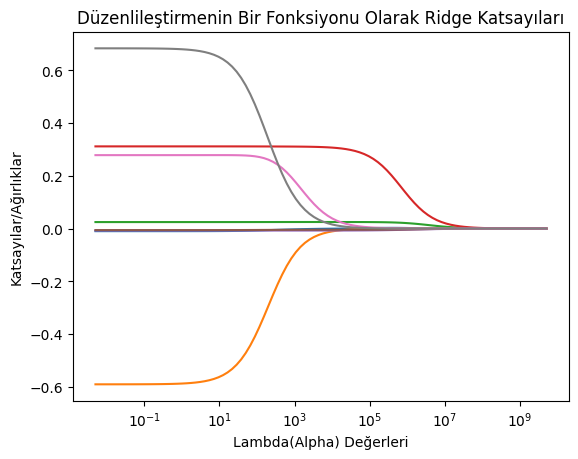

In [129]:
#belirlenen aralıkta lambda değerleri oluşturuyoruz
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

import matplotlib.pyplot as plt    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

In [130]:
#Tahmin
y_pred = ridge_model.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

11.25260586231993

In [132]:
#Model Tuning
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [133]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [134]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error")

In [135]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [136]:
#optimum lambda değerini bulduk
ridge_cv.alpha_

10046.16501282523

In [137]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train,y_train)

In [138]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

11.218861599737613

**Lasso Regresyonu**

In [139]:
#kategorik değişkenlerin dummy değişkene dönüştürülmesi
ms = pd.get_dummies(df[['Result']])
y = df["Diastolic blood pressure"]
X_ = df.drop(['Diastolic blood pressure','Result'], axis=1).astype('float64')
X = pd.concat([X_, ms[['Result_positive']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58)
#Lasso, regresyon katsayılarını küçültür ve bazı katsayıları sıfıra indirir, bu sayede değişken seçimi yaparak modelin sadeliğini ve yorumlanabilirliğini artırır.

In [140]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [141]:
lasso_model.coef_

array([-0.003379  , -0.09362357,  0.02476017,  0.31132877, -0.0076105 ,
       -0.00475897,  0.23469931,  0.18129343])

Text(0, 0.5, 'Katsayılar/Ağırlıklar')

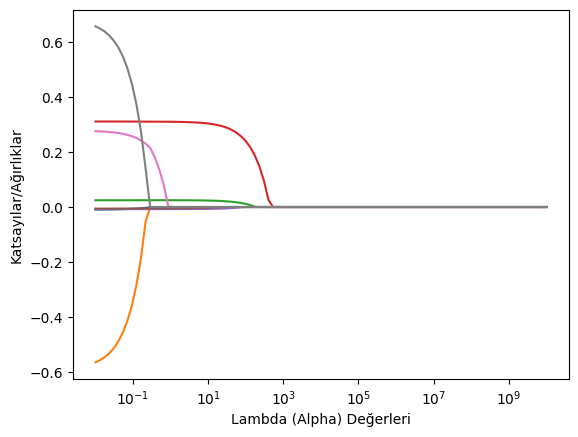

In [142]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
  
import matplotlib.pyplot as plt  
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda (Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
#λ değeri arttıkça modeldeki bazı değişkenler sıfıra inerek modelden çıkar. Bu, Lasso'nun değişken seçim yeteneğini gösterir.

In [143]:
#Tahmin
lasso_model.predict(X_test)

array([80.69209087, 60.56912525, 75.07260136, 64.88240181, 66.06861064,
       67.08434824, 80.88428999, 67.44172892, 79.18751187, 74.87611206,
       77.67230379, 67.80225413, 72.12614528, 63.60780099, 78.90849145,
       61.17450073, 73.83756712, 74.38181354, 67.13698838, 72.7778876 ,
       80.80053991, 68.27915321, 69.97208166, 76.38803879, 75.14197736,
       65.03141586, 84.03575416, 63.64787413, 68.66664675, 80.43148039,
       66.42554127, 71.73538664, 80.75630937, 69.38398339, 60.88802002,
       68.58902964, 66.19560376, 79.58834755, 82.02457549, 65.40603901,
       78.57203594, 86.03760466, 70.16521929, 79.54984662, 73.537409  ,
       61.15423133, 79.14754108, 68.80354323, 81.24068863, 67.47320937,
       70.31256347, 70.10344371, 65.25311348, 62.37380774, 77.90229918,
       70.10109173, 64.05553352, 73.73679093, 97.47405802, 78.55978642,
       86.77331329, 60.79053514, 71.33384932, 73.19914814, 60.98466678,
       74.49678802, 66.3341789 , 79.20024623, 72.89343694, 70.55

In [144]:
y_pred = lasso_model.predict(X_test)

In [145]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.227422043324106

In [146]:
#Model Tuning
from sklearn.linear_model import LassoCV

In [147]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000)

In [148]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [149]:
lasso_cv_model.alpha_

4.732747408135578

In [150]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [151]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=4.732747408135578)

In [152]:
y_pred = lasso_tuned.predict(X_test)

In [153]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.22060534168735

**ElasticNet (eNet) Regresyonu**

In [154]:
#kategorik değişkenlerin dummy değişkene dönüştürülmesi
ms = pd.get_dummies(df[['Result']])
y = df["Diastolic blood pressure"]
X_ = df.drop(['Diastolic blood pressure','Result'], axis=1).astype('float64')
X = pd.concat([X_, ms[['Result_positive']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58)
#Lasso ve Ridge yöntemlerini birleştiren bir yöntem
#ElasticNet, hem L1 hem de L2 normlarını kullanarak katsayıları küçültür ve bazılarını sıfıra indirir

In [155]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

array([-0.        , -0.        ,  0.02474896,  0.31066327, -0.00754269,
       -0.00422339,  0.        ,  0.        ])

In [156]:
enet_model.intercept_

31.765712712660488

In [157]:
#Tahmin
enet_model

ElasticNet()

In [158]:
enet_model.predict(X_test)

array([80.85400749, 60.57886887, 75.10567602, 64.99642197, 66.15977518,
       66.97954564, 81.09063557, 67.43774937, 79.11872323, 75.07512015,
       77.62381918, 67.86615945, 71.76739989, 63.86987102, 79.10088526,
       60.94386024, 73.94723692, 74.44419461, 67.17335832, 72.97151813,
       81.01083731, 68.47586201, 69.98298434, 76.46308899, 75.23519215,
       65.17812391, 84.00409371, 63.59238619, 68.648017  , 80.58911265,
       66.43488934, 71.96813916, 80.92090197, 69.44379898, 60.98932239,
       68.84939657, 66.28311905, 79.69705814, 81.64059886, 65.59877165,
       78.74893479, 85.31074507, 70.34714003, 79.52438902, 73.72944425,
       61.15746575, 78.97503736, 68.88359851, 80.99772515, 67.31055771,
       70.22056838, 70.11555351, 65.55246134, 62.36402761, 77.89322296,
       70.0745053 , 63.67881743, 73.71646079, 97.45009862, 78.57709504,
       86.50804465, 60.19815695, 71.40032402, 73.33651533, 61.2650062 ,
       74.73552606, 66.36878943, 79.1172799 , 72.90095104, 70.57

In [159]:
y_pred = enet_model.predict(X_test)

In [160]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.21475015854867

In [161]:
r2_score(y_test, y_pred)

0.3441824970756838

In [162]:
#Model Tuning
from sklearn.linear_model import ElasticNetCV

In [163]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [164]:
enet_cv_model.alpha_

7.677754674157501

In [165]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [166]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [167]:
y_pred = enet_tuned.predict(X_test)

In [168]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.220881686491168

**Doğrusal Regresyon ile Bulunan RMSE= 11.36584455671378**

**Çoklu Doğrusal Regresyon ile Bulunan RMSE= 11.815881985617926**

**PCR (Temel Bileşen Regresyonu - Principal Component Regression) ile Bulunan RMSE= 11.537125840116067**

**PLS (Kısmi En Küçük Kareler Regresyonu) ile Bulunan RMSE= 11.23658270071209**

**Ridge Regresyonu ile Bulunan RMSE= 11.218861599737613**

**Lasso Regresyonu ile Bulunan RMSE= 11.22060534168735**

**ElasticNet (eNet) Regresyonu ile Bulunana RMSE= 11.220881686491168**

**Yukarıda kullandığımız modellerin RMSE çıktılarına bakılınca RMSE'si en düşük çıkan Ridge Regresyonu bu yöntemlerden en güveniliri olduğu söylenebilir.**

**.....**

**GÖZETİMSİZ ÖĞRENME**

In [169]:
!pip install yellowbrick
!pip install --upgrade matplotlib

In [170]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from yellowbrick.cluster import KElbowVisualizer


**K-Means**

İşlem adımları:

    1. Küme sayısını belirle
    2. Rastgele k merkezi seç
    3. Her gözlem için k merkezlerine olan uzaklıkları hesapla
    4. Gözlemleri kendilerine en yakın k merkezine ata
    5. Atama işleminden sonra oluşan kümeler için tekrar küme merkezi hesapla
    6. belirlenen iterasyon kadar işlemi tekrarla, küme içi hata değerinin en küçük olduğu durumdaki gözlemlerin kümelenme yapısını nihai kümelenme olarak seç

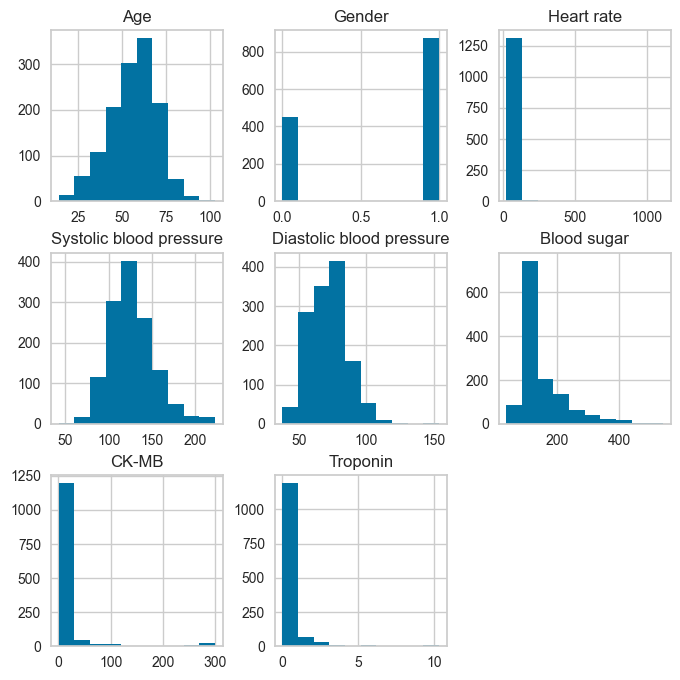

In [171]:
numeric_all_df.hist(figsize = (8,8));

In [172]:
#K-Means modeli
kmeans = KMeans(n_clusters = 2)
kmeans

KMeans(n_clusters=2)

In [173]:
help(kmeans)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several 

In [181]:
k_fit = kmeans.fit(numeric_df)

In [182]:
k_fit.n_clusters

2

In [183]:
k_fit.cluster_centers_

array([[2.47500000e+01, 6.25000000e-01, 8.32500000e+01, 1.10250000e+02,
        6.92500000e+01, 2.72125000e+02, 3.01687500e+01, 1.35875000e-01],
       [2.48148148e+01, 6.66666667e-01, 7.48148148e+01, 1.31296296e+02,
        7.11851852e+01, 1.15074074e+02, 4.54592593e+00, 1.14555556e-01]])

In [184]:
k_fit.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

**Görselleştirme**

In [185]:
#iki degisken uzerinden gorsellestirme yapalim (2 boyutta veriyi gorebilmek icin)
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(numeric_df)

In [186]:
kumeler = k_fit.labels_

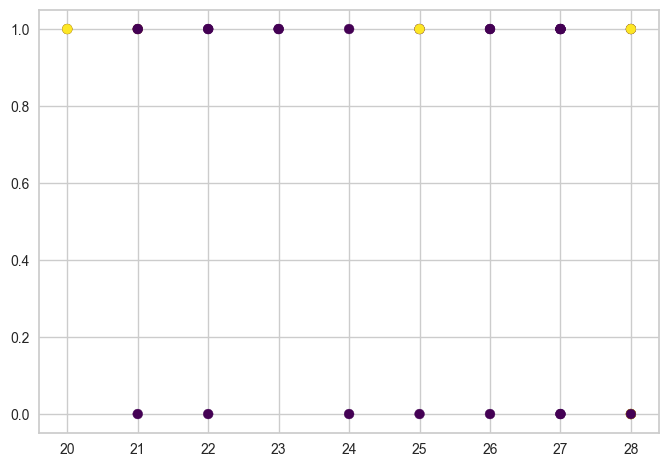

In [187]:
plt.scatter(numeric_df.iloc[:,0], numeric_df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

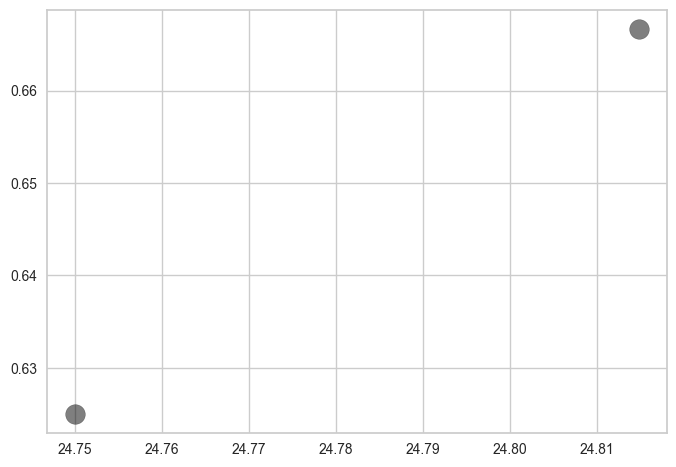

In [188]:
merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

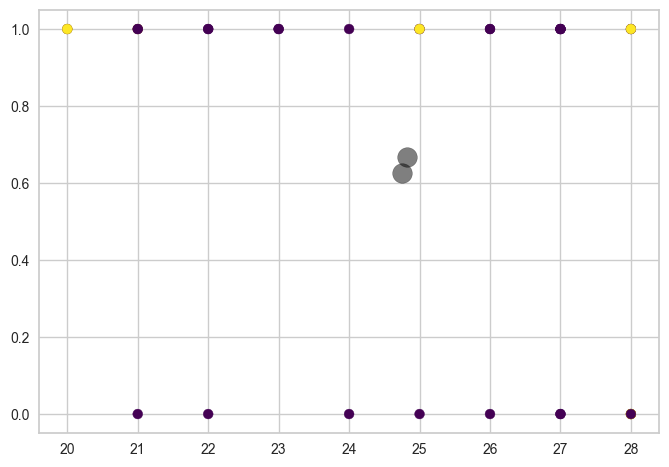

In [189]:
plt.scatter(numeric_df.iloc[:,0], numeric_df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [190]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(numeric_df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [191]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(numeric_df.iloc[:, 0], numeric_df.iloc[:, 1], numeric_df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [192]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(numeric_df.iloc[:, 0], numeric_df.iloc[:, 1], numeric_df.iloc[:, 2],  c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           s=1000);


<Figure size 1600x900 with 0 Axes>

In [193]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(numeric_df)
kumeler = k_fit.labels_

In [194]:
pd.DataFrame({"Satır" : numeric_df.index, "Kumeler": kumeler})[0:10]

,Satır,Kumeler
0,1,1
1,54,0
2,109,0
3,203,0
4,229,0
5,241,0
6,317,0
7,321,0
8,401,1
9,407,1


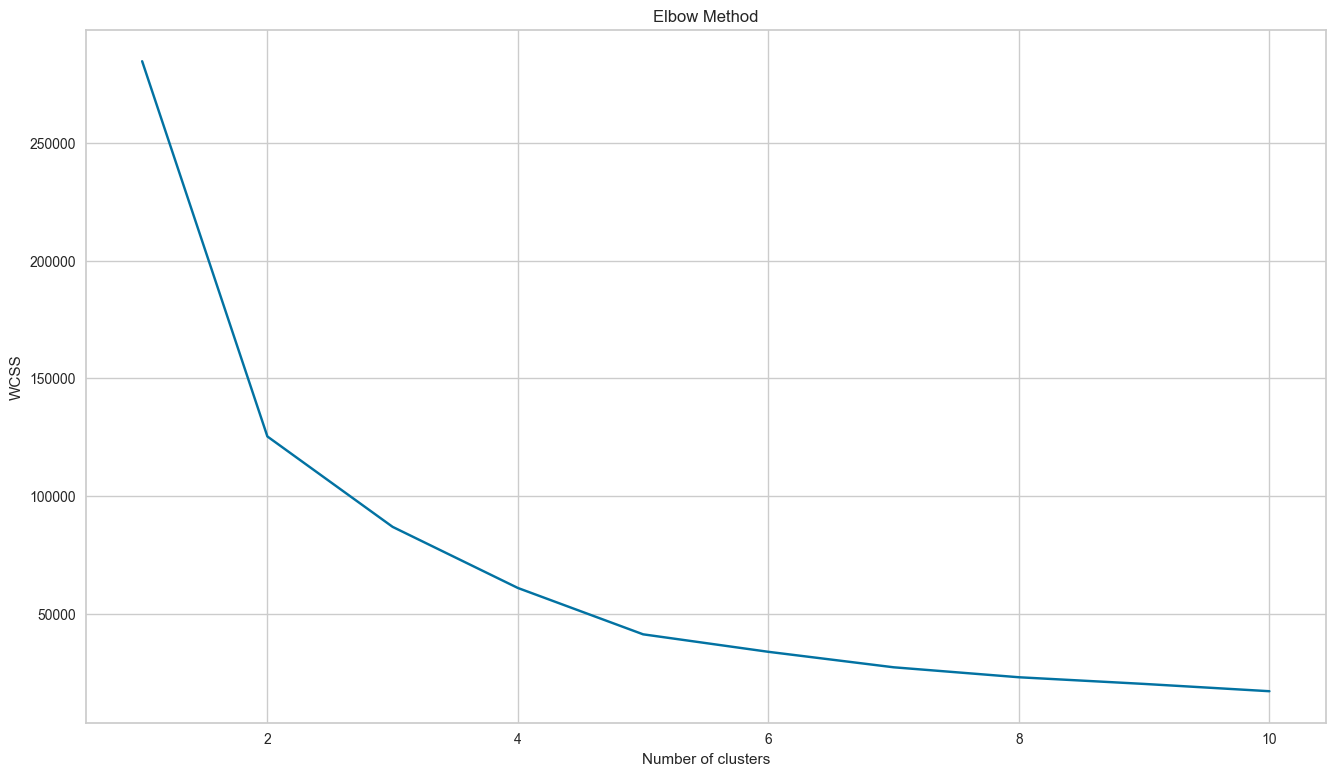

In [195]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Hata karelerini saklamak için bir liste oluşturun
wcss = []

# Farklı küme sayıları için K-Means modelini eğitin
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(numeric_df)
    wcss.append(kmeans.inertia_)

# Elbow grafiğini çizin
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [196]:
numeric_df["kume_no"] = kumeler

In [197]:
numeric_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,kume_no
1,20,1,94,98,46,296.0,6.75,1.060,1
54,28,0,78,127,61,114.0,19.47,0.010,0
109,20,1,60,156,60,103.0,5.22,1.840,0
203,25,1,64,153,93,110.0,3.09,0.097,0
229,25,1,77,175,98,109.0,2.70,0.003,0


In [198]:
numeric_df["kume_no"] = numeric_df["kume_no"] + 1

In [199]:
numeric_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,kume_no
1,20,1,94,98,46,296.0,6.75,1.060,2
54,28,0,78,127,61,114.0,19.47,0.010,1
109,20,1,60,156,60,103.0,5.22,1.840,1
203,25,1,64,153,93,110.0,3.09,0.097,1
229,25,1,77,175,98,109.0,2.70,0.003,1


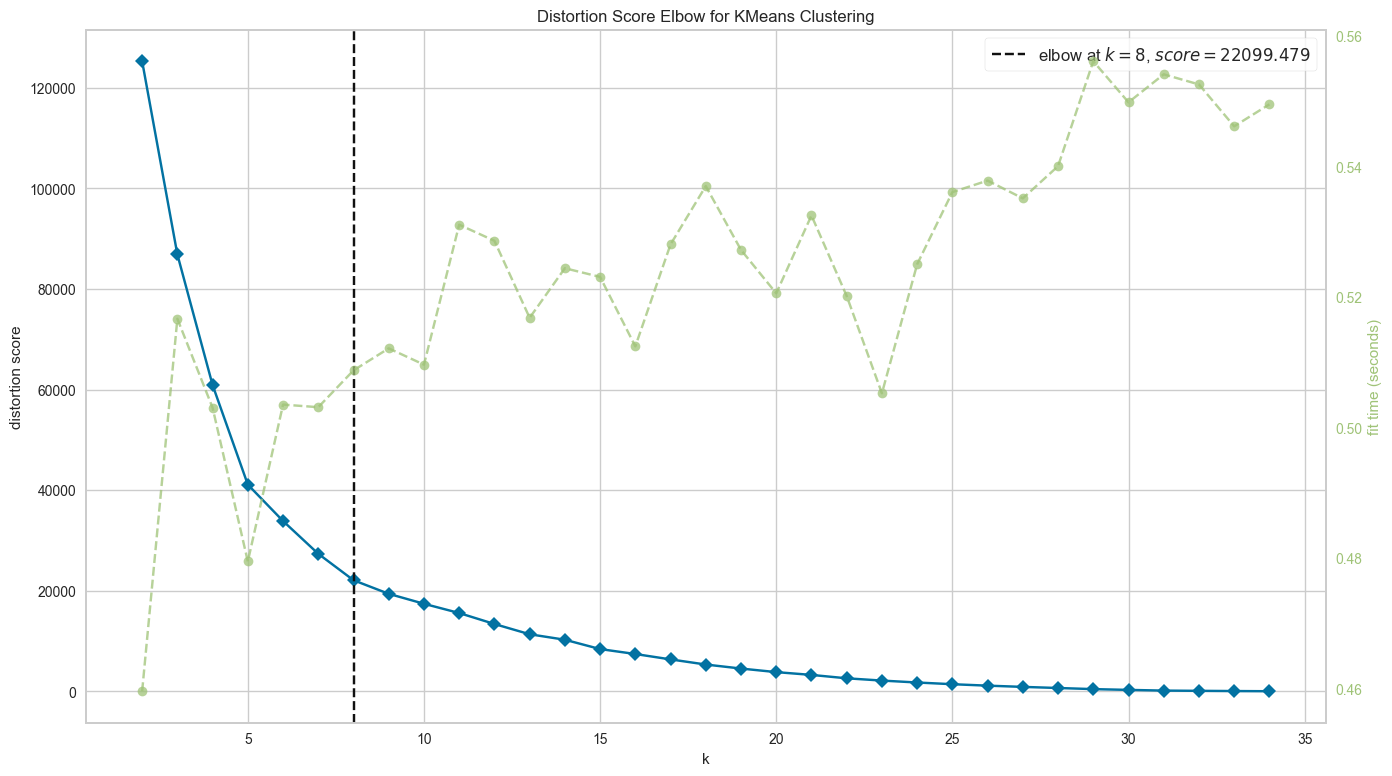

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [200]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,35))
visualizer.fit(numeric_df) 
visualizer.poof() 

In [201]:
visualizer.elbow_value_
#Not: burada optimum değer 9 görünüyor ancak verisetinin durumu, elde edilmek istenen sonuç ve veriseti hakkında on bilgi de göz önünde bulunarak alınan uzman kararı burada çok önemlidir.

8

In [202]:
kmeans = KMeans(n_clusters = 8)
k_fit = kmeans.fit(numeric_df)
kumeler = k_fit.labels_

In [204]:
pd.DataFrame({"Satır" : numeric_df.index, "Kumeler": kumeler})[0:10]
#Bu atamalar, veri noktalarının benzerliklerine dayanarak kümelere nasıl dağıldığını gösterir. Aynı kümeye atanan veri noktaları, algoritmanın belirlediği kriterlere göre birbirlerine daha yakın ve benzer özelliklere sahip olarak değerlendirilir. Örneğin:

# 1, 54 ve 109 numaralı satırlar farklı kümelerde yer alıyor, bu da onların birbirinden farklı özelliklere sahip olduğunu gösterir.
#241, 317 ve 321 numaralı satırlar aynı kümeye (küme 2) atanmış, bu da onların benzer özelliklere sahip olduğunu ve algoritmanın onları bir arada değerlendirdiğini gösterir.

,Satır,Kumeler
0,1,1
1,54,5
2,109,5
3,203,0
4,229,0
5,241,2
6,317,2
7,321,2
8,401,7
9,407,3


**Hiyerarşik Kümeleme**

Agglomerative Hierarchical Clustering işlem adımları:

Başlangıçta gözlem sayısı kadar küme vardır.
1. Veriseti içinde birbirine en yakın olan iki gözlemi bul
2. Bulunan iki noktayı bir araya getir ve yeni bir küme oluştur.
3. Aynı işlemi tek bir küme kalıncaya kadar tekrarla

In [205]:
#hiyerarşik kümeleme için metodlar
hc_complete = linkage(numeric_df, "complete")
hc_average = linkage(numeric_df, "average")
hc_single = linkage(numeric_df, "single")

In [206]:
hc_complete

array([[ 30.        ,  32.        ,   7.90173557,   2.        ],
       [  6.        ,  21.        ,   8.30422182,   2.        ],
       [ 16.        ,  34.        ,   9.27467541,   2.        ],
       [ 12.        ,  19.        ,   9.7681165 ,   2.        ],
       [ 25.        ,  33.        ,  17.59740916,   2.        ],
       [  7.        ,  36.        ,  18.91442836,   3.        ],
       [ 17.        ,  38.        ,  19.8751    ,   3.        ],
       [ 15.        ,  28.        ,  21.06472229,   2.        ],
       [ 14.        ,  18.        ,  22.15075847,   2.        ],
       [ 22.        ,  39.        ,  23.593654  ,   3.        ],
       [  3.        ,   4.        ,  26.06071634,   2.        ],
       [ 37.        ,  45.        ,  28.95684114,   4.        ],
       [  5.        ,  41.        ,  29.15547292,   4.        ],
       [  1.        ,  29.        ,  31.38555319,   2.        ],
       [  0.        ,  42.        ,  31.49932141,   3.        ],
       [ 35.        ,  48

In [207]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

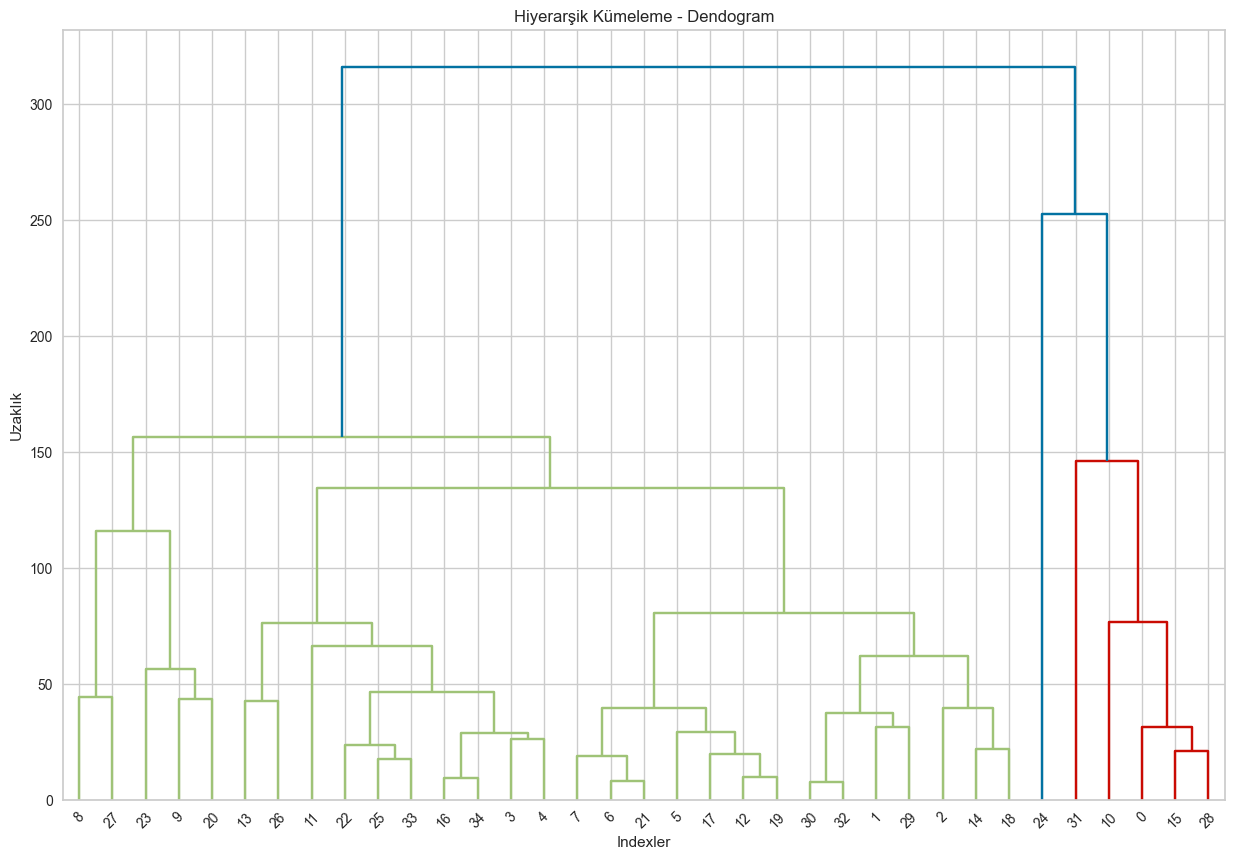

In [208]:
#dendogramın oluşturulması
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

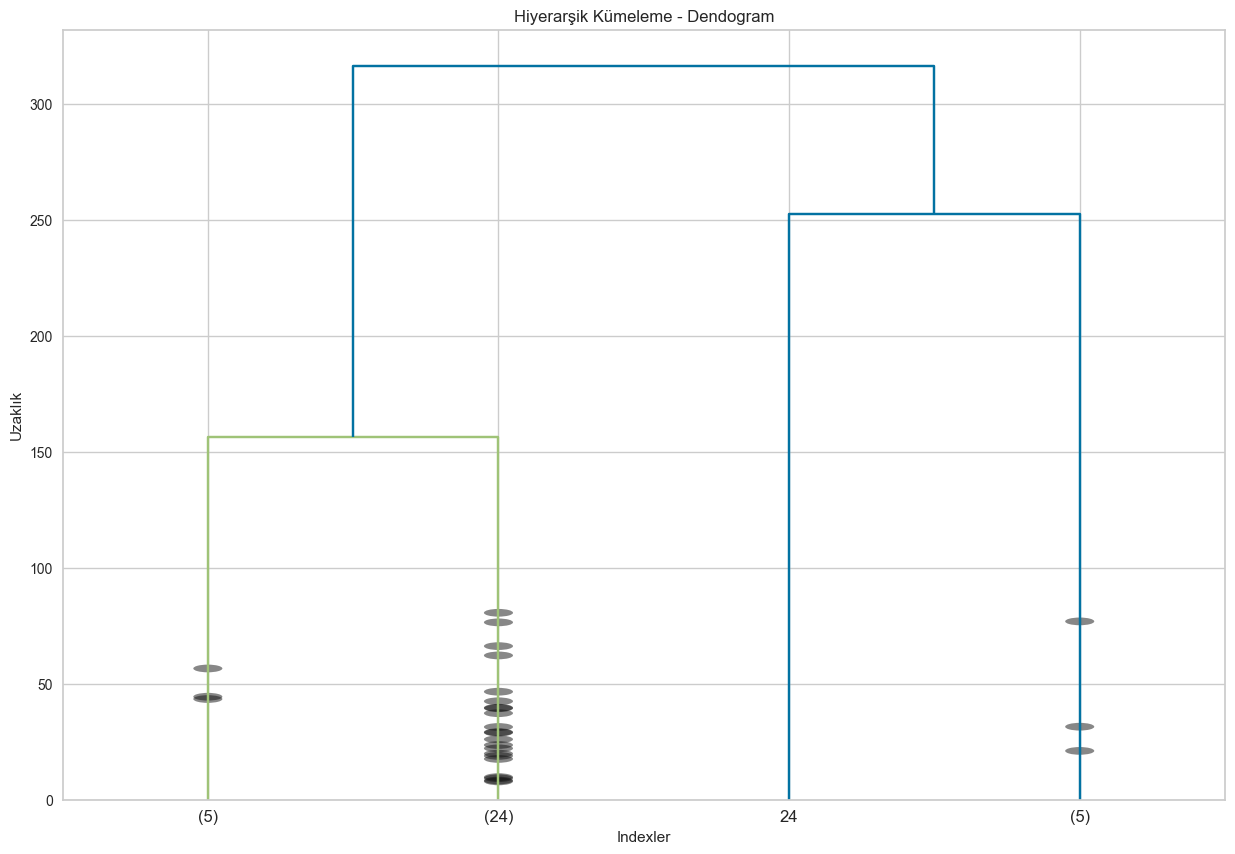

In [209]:
#son 4 kümeyi göster

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

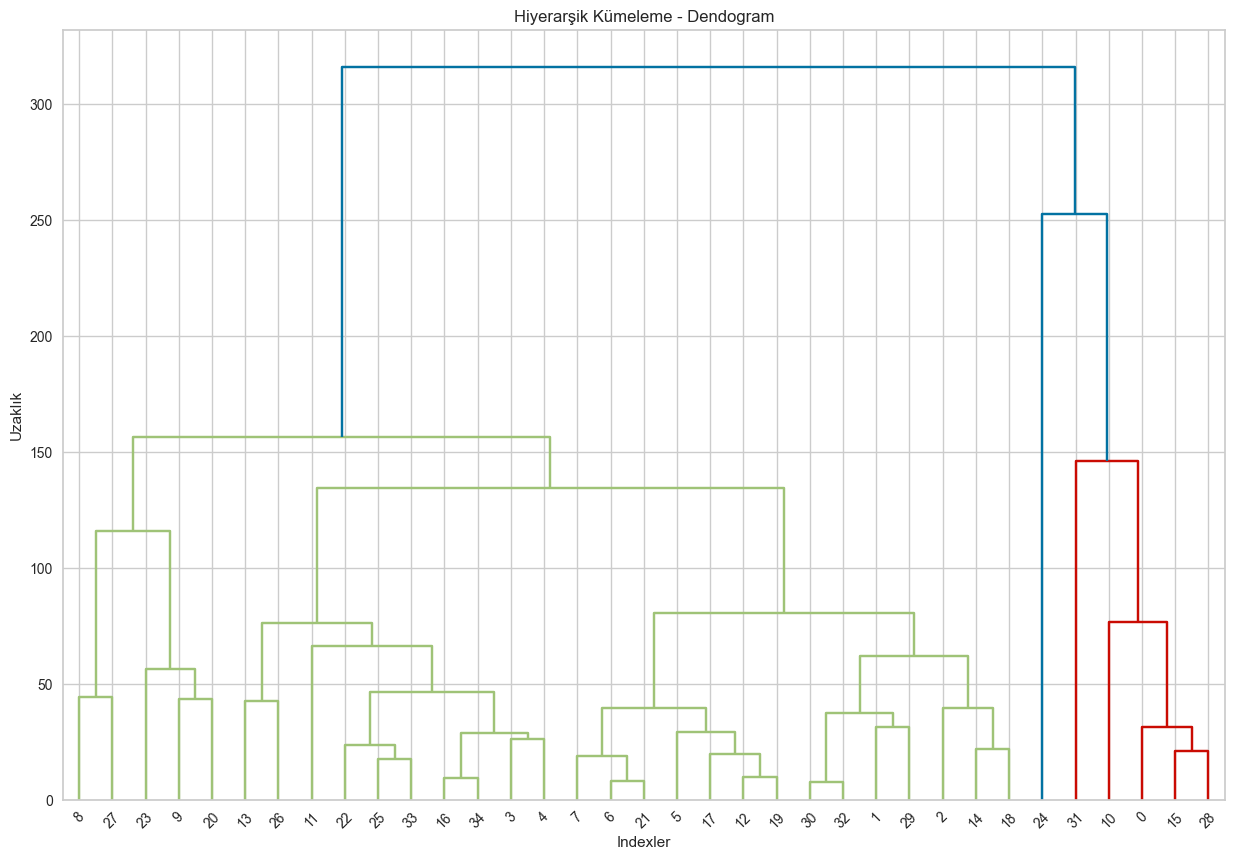

In [212]:
#Optimum küme sayısını belirleme
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);
#Çıkan grafikte uzaklik kısmında 100 dogrultusuna bakarak 7 uygun olabilir denilebilir.

In [213]:
help(den)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [214]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

In [215]:
#ustteki grafikte uzaklik kısmında 100 dogrultusuna bakarak 7 uygun olabilir denilebilir. 
#uzman yorumuyla birlikte farkli değerler de seçilebilir
cluster = AgglomerativeClustering(n_clusters = 7, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(numeric_df)

array([3, 1, 0, 0, 0, 1, 1, 1, 2, 4, 3, 0, 1, 0, 0, 3, 0, 1, 0, 1, 4, 1,
       0, 4, 5, 0, 0, 2, 3, 1, 1, 6, 1, 0, 0], dtype=int64)

In [216]:
pd.DataFrame({"Satır" : numeric_df.index, "Kumeler": cluster.fit_predict(numeric_df)})[0:10]

,Satır,Kumeler
0,1,3
1,54,1
2,109,0
3,203,0
4,229,0
5,241,1
6,317,1
7,321,1
8,401,2
9,407,4


In [217]:
numeric_df["kume_no"] = cluster.fit_predict(numeric_df)

In [218]:
numeric_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,kume_no
1,20,1,94,98,46,296.0,6.75,1.060,3
54,28,0,78,127,61,114.0,19.47,0.010,1
109,20,1,60,156,60,103.0,5.22,1.840,0
203,25,1,64,153,93,110.0,3.09,0.097,0
229,25,1,77,175,98,109.0,2.70,0.003,0


**PCA (Temel Bileşen Analizi)**

In [219]:
#veri standardizasyonu
numeric_df = StandardScaler().fit_transform(numeric_df)
numeric_df[0:5,0:5]

array([[-1.71679015,  0.72231512,  1.22901389, -0.88578106, -1.5512242 ],
       [ 1.14452677, -1.38443731,  0.08953081,  0.01599204, -0.61081692],
       [-1.71679015,  0.72231512, -1.19238765,  0.91776513, -0.67351074],
       [ 0.07153292,  0.72231512, -0.90751688,  0.82447826,  1.39538528],
       [ 0.07153292,  0.72231512,  0.01831312,  1.50858199,  1.70885437]])

In [220]:
#herhangi bir boyut indirgemesi yapmadan tum degiskenler icin bilesen olusturalim
pca = PCA()
pca_fit = pca.fit_transform(numeric_df)

In [221]:
bilesen_df = pd.DataFrame(data = pca_fit)
bilesen_df.head()

,0,1,2,3,4,5,6,7,8
0,1.889155,3.529988,1.063728,-1.313146,0.020722,0.784180,-0.056037,0.265035,-0.354320
1,0.248949,-1.658216,0.122582,-0.379356,-0.343316,0.926774,0.017634,0.365969,0.084041
2,-1.780959,3.106073,3.318705,0.125385,0.294403,1.992145,-1.388008,-0.201932,0.282779
3,-1.787589,-0.122154,-0.215107,0.974853,0.275893,-0.483686,-0.590626,-0.424948,-0.242446
4,-2.185362,0.069665,-1.152726,0.761173,-0.135514,-0.311359,-0.387810,-0.107112,-0.068876


In [222]:
pca.explained_variance_ratio_

array([0.29549979, 0.18776409, 0.15972203, 0.1195807 , 0.08046299,
       0.07668717, 0.04956773, 0.02016364, 0.01055186])

**Not:** birinci bilesenin versetindeki varyansı açıklayabilme oranı 0.29549979, 2. bileşenin versetindeki varyansı açıklayabilme oranı 0.18776409, ...

In [223]:
#4 bilesen verisetindeki varyansin cogunu ifade ediyor. 4 bilesene indirgedik
pca = PCA(n_components = 4)
pca_fit = pca.fit_transform(numeric_df)

In [224]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen", "ucuncu_bilesen", "dorduncu_bilesen"])
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen,dorduncu_bilesen
0,1.889155,3.529988,1.063728,-1.313146
1,0.248949,-1.658216,0.122582,-0.379356
2,-1.780959,3.106073,3.318705,0.125385
3,-1.787589,-0.122154,-0.215107,0.974853
4,-2.185362,0.069665,-1.152726,0.761173


In [225]:
pca.explained_variance_ratio_
#Not: birinci bilesenin versetindeki varyansı açıklayabilme oranı 0.29549979, 2. bileşenin versetindeki varyansı açıklayabilme oranı 0.18776409, ...

array([0.29549979, 0.18776409, 0.15972203, 0.1195807 ])

In [226]:
pca = PCA().fit(numeric_df)

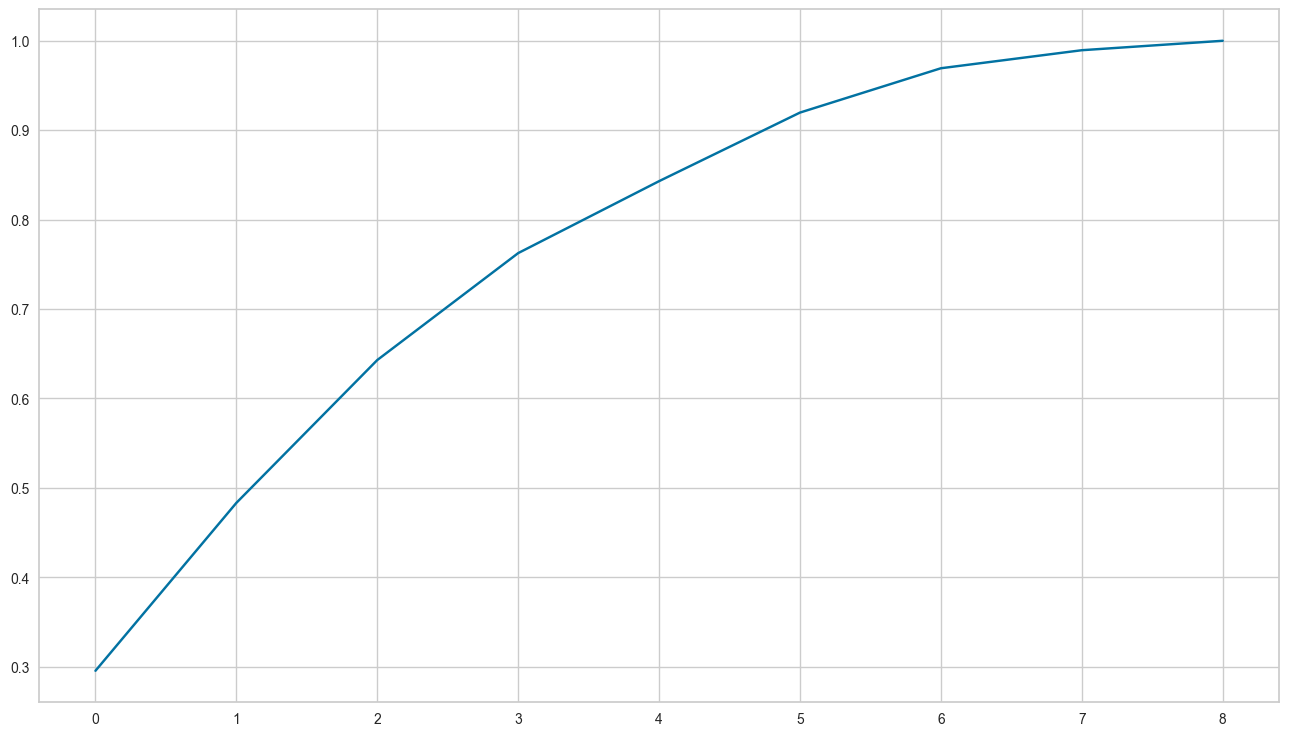

In [227]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#Principal Component Analysis (PCA) uygulamasının sonucunda elde edilen bileşenlerin açıklama oranlarını kümülatif (toplam) olarak grafikte göstermeye yarar. Bu tür grafikler, veri setinizde kaç ana bileşen (principal component) kullanmanız gerektiğine karar vermenizde yardımcı olabilir.
#Eğrinin hızla yükseldiği yerlerde, o ana bileşenin veri setindeki varyansın büyük bir kısmını açıkladığını gösterir. Eğri yatay hale geldiğinde, eklenen yeni bileşenlerin veri setine katkısının azaldığı anlamına gelir.

**Not:** yukarıdaki grafik incelendiğinde (x ekseni 0=1, 1=2 gibi düşünelim) 5 bileşen kullandığımızda verisetinin 95%'sinden fazlasını açıklayabiliyoruz anlamına gelir.